# Lead Scoring assignment

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

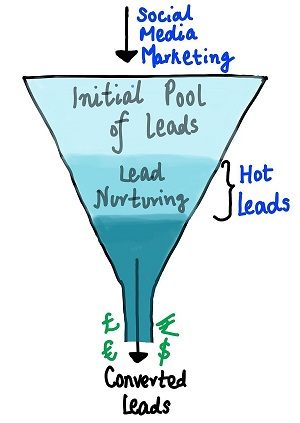

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Business objective:

- Build a **logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future. 

***
# Outline

### 0. Import libraries and data
### 1. Data quality check
- Check missing values
- Check duplicated entries
### 2. Data cleaning
- Treat/flag missing values
- Clean up categorical feature
### 3. EDA
- 3.1 Univariate EDA
- 3.2 Multivariate EDA
- 3.3 EDA Conclusion
### 4. Data processing
- 4.1 Drop unnecessary columns
- 4.2 - 4.3 Treat outliers/missing values as indicated in EDA
- 4.4 Convert categorical variables to WOE and dummies
- 4.5 View data after processing.
### 5. Building model
- 5.0 Train/test split and feature scaling
- 5.1 Building model 1
- 5.2 Building model 2
- 5.3 Building model 3
- 5.4 Compare models' performance with ROC AUC
- 5.5 K-fold cross validation
- 5.6 Final model selection and feature interpretation
- 5.7 Lead scoring
### 6. Subjective questions
- Question 3
- Question 4

***

# 0. Import libraries, version check

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels

# all columns, limit 200 rows
pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", 200)

# round up DISPLAY 4 decimal
# pd.options.display.float_format = "{:,.4f}".format

# chain assignment warning
pd.options.mode.chained_assignment = None  # default='warn'

Version compatibility check

In [2]:
from platform import python_version

# Compare currently installed versions
print('Compare current versions of installed libraries to the ones used to create this notebook:')
print(f'Current Python version: {python_version()}')
print('Used Python version   : 3.9.15', end=' ')
print('----> Matched.') if python_version() == '3.9.15' else print('----> Not matched.')   
print('*'*70)
used_library_version = [
    (pd, 'Pandas','1.5.2'), 
    (np,'Numpy','1.22.3'), 
    (matplotlib, 'Matplotlib','3.7.1'), 
    (sns, 'Seaborn','0.12.1'),
    (sklearn, 'sklearn', '1.1.3'),
    (statsmodels, 'statsmodels' ,'0.13.2')
]

compare_version = pd.DataFrame({
    '  Library':        [lib_name                    for lib, lib_name, used_ver in used_library_version],
    '  Installed ver.': [lib.__version__             for lib, lib_name, used_ver in used_library_version],
    '  Used ver.':      [used_ver                    for lib, lib_name, used_ver in used_library_version],
    '  Version match?': [lib.__version__ == used_ver for lib, lib_name, used_ver in used_library_version]
    })
print(compare_version)

Compare current versions of installed libraries to the ones used to create this notebook:
Current Python version: 3.9.15
Used Python version   : 3.9.15 ----> Matched.
**********************************************************************
       Library   Installed ver.   Used ver.    Version match?
0       Pandas            1.5.2       1.5.2              True
1        Numpy           1.22.3      1.22.3              True
2   Matplotlib            3.7.1       3.7.1              True
3      Seaborn           0.12.1      0.12.1              True
4      sklearn            1.1.3       1.1.3              True
5  statsmodels           0.13.2      0.13.2              True


- For precaution, I tried to use the most up-to-date method and avoided using soon-to-be deprecated syntax (as stated by FutureWarning if encountered) to the best of my ability, with libraries version mentioned above.
- In the very rare case that you run into any error, please try updating/reverting your libraries' versions to the "Used ver." listed above, as older or newer libraries version might have unsupported/deprecated syntax (especially for Matplotlib and Seaborn).

# Import data

In [3]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# drop Prospect ID, Lead_Number
df = df.drop(columns = ['Prospect ID', 'Lead Number'])

In [5]:
# replace whitespace in column name
df.columns = [column_name.replace(' ', '_') for column_name in df.columns]

In [6]:
# rearrange column
# group functionally similar columns together

columns_rearranged = [
    'Lead_Origin',
    'Lead_Source',
    'Tags',
    'Lead_Quality',
    'Lead_Profile',
    
    # Activities
    'TotalVisits',
    'Total_Time_Spent_on_Website',
    'Page_Views_Per_Visit',
    'Last_Activity',
    'Last_Notable_Activity',

    'Asymmetrique_Activity_Index',
    'Asymmetrique_Profile_Index',
    'Asymmetrique_Activity_Score',
    'Asymmetrique_Profile_Score',
    
    # Background info
    'City',
    'Country',
    'Specialization',
    'What_is_your_current_occupation',
    
    # Choice
    'Do_Not_Email',
    'Do_Not_Call',
    'I_agree_to_pay_the_amount_through_cheque',
    'A_free_copy_of_Mastering_The_Interview',
    'Receive_More_Updates_About_Our_Courses',
    'Update_me_on_Supply_Chain_Content',
    'Get_updates_on_DM_Content',
    
    # Marketing related
    'How_did_you_hear_about_X_Education',
    'What_matters_most_to_you_in_choosing_a_course',
    'Search',
    'Magazine',
    'Newspaper_Article',
    'X_Education_Forums',
    'Newspaper',
    'Digital_Advertisement',
    'Through_Recommendations',
    
    # Target
    'Converted'
]

df = df[columns_rearranged]
df.head()

,Lead_Origin,Lead_Source,Tags,Lead_Quality,Lead_Profile,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Last_Notable_Activity,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,City,Country,Specialization,What_is_your_current_occupation,Do_Not_Email,Do_Not_Call,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Receive_More_Updates_About_Our_Courses,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,How_did_you_hear_about_X_Education,What_matters_most_to_you_in_choosing_a_course,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,Converted
0,API,Olark Chat,Interested in other courses,Low in Relevance,Select,0.0,0,0.0,Page Visited on Website,Modified,02.Medium,02.Medium,15.0,15.0,Select,NaN,Select,Unemployed,No,No,No,No,No,No,No,Select,Better Career Prospects,No,No,No,No,No,No,No,0
1,API,Organic Search,Ringing,NaN,Select,5.0,674,2.5,Email Opened,Email Opened,02.Medium,02.Medium,15.0,15.0,Select,India,Select,Unemployed,No,No,No,No,No,No,No,Select,Better Career Prospects,No,No,No,No,No,No,No,0
2,Landing Page Submission,Direct Traffic,Will revert after reading the email,Might be,Potential Lead,2.0,1532,2.0,Email Opened,Email Opened,02.Medium,01.High,14.0,20.0,Mumbai,India,Business Administration,Student,No,No,No,Yes,No,No,No,Select,Better Career Prospects,No,No,No,No,No,No,No,1
3,Landing Page Submission,Direct Traffic,Ringing,Not Sure,Select,1.0,305,1.0,Unreachable,Modified,02.Medium,01.High,13.0,17.0,Mumbai,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Word Of Mouth,Better Career Prospects,No,No,No,No,No,No,No,0
4,Landing Page Submission,Google,Will revert after reading the email,Might be,Select,2.0,1428,1.0,Converted to Lead,Modified,02.Medium,01.High,15.0,18.0,Mumbai,India,Select,Unemployed,No,No,No,No,No,No,No,Other,Better Career Prospects,No,No,No,No,No,No,No,1


In [7]:
# rename/shorten column names
columns_renamed = {
    'TotalVisits': 'Total_Visits',
    'Total_Time_Spent_on_Website': 'Total_Time_Spent',

    'Asymmetrique_Activity_Index': 'AA_Index',
    'Asymmetrique_Profile_Index' : 'AP_Index',
    'Asymmetrique_Activity_Score': 'AA_Score',
    'Asymmetrique_Profile_Score' : 'AP_Score',
    
    # Background info
    'What_is_your_current_occupation': 'Occupation',
    
    # Choice
    'I_agree_to_pay_the_amount_through_cheque': 'Pay_By_Cheque',
    'A_free_copy_of_Mastering_The_Interview'  : 'Free_Copy',
    'Receive_More_Updates_About_Our_Courses'  : 'Receive_Courses_Update',
    'Update_me_on_Supply_Chain_Content'       : 'Receive_SCS_Update',
    'Get_updates_on_DM_Content'               : 'Receive_DM_Update',
    
    # Marketing related
    'How_did_you_hear_about_X_Education': 'Hear_From',
    'What_matters_most_to_you_in_choosing_a_course': 'What_Matters_Most',
    'Search'               : 'Seen_Search',
    'Magazine'             : 'Seen_Magazine',
    'Newspaper_Article'    : 'Seen_Article',
    'X_Education_Forums'   : 'Seen_XForums',
    'Newspaper'            : 'Seen_Newspaper',
    'Digital_Advertisement': 'Seen_Digital',
    'Through_Recommendations': 'Recommended',
}
df = df.rename(columns=columns_renamed)
df.head()

,Lead_Origin,Lead_Source,Tags,Lead_Quality,Lead_Profile,Total_Visits,Total_Time_Spent,Page_Views_Per_Visit,Last_Activity,Last_Notable_Activity,AA_Index,AP_Index,AA_Score,AP_Score,City,Country,Specialization,Occupation,Do_Not_Email,Do_Not_Call,Pay_By_Cheque,Free_Copy,Receive_Courses_Update,Receive_SCS_Update,Receive_DM_Update,Hear_From,What_Matters_Most,Seen_Search,Seen_Magazine,Seen_Article,Seen_XForums,Seen_Newspaper,Seen_Digital,Recommended,Converted
0,API,Olark Chat,Interested in other courses,Low in Relevance,Select,0.0,0,0.0,Page Visited on Website,Modified,02.Medium,02.Medium,15.0,15.0,Select,NaN,Select,Unemployed,No,No,No,No,No,No,No,Select,Better Career Prospects,No,No,No,No,No,No,No,0
1,API,Organic Search,Ringing,NaN,Select,5.0,674,2.5,Email Opened,Email Opened,02.Medium,02.Medium,15.0,15.0,Select,India,Select,Unemployed,No,No,No,No,No,No,No,Select,Better Career Prospects,No,No,No,No,No,No,No,0
2,Landing Page Submission,Direct Traffic,Will revert after reading the email,Might be,Potential Lead,2.0,1532,2.0,Email Opened,Email Opened,02.Medium,01.High,14.0,20.0,Mumbai,India,Business Administration,Student,No,No,No,Yes,No,No,No,Select,Better Career Prospects,No,No,No,No,No,No,No,1
3,Landing Page Submission,Direct Traffic,Ringing,Not Sure,Select,1.0,305,1.0,Unreachable,Modified,02.Medium,01.High,13.0,17.0,Mumbai,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Word Of Mouth,Better Career Prospects,No,No,No,No,No,No,No,0
4,Landing Page Submission,Google,Will revert after reading the email,Might be,Select,2.0,1428,1.0,Converted to Lead,Modified,02.Medium,01.High,15.0,18.0,Mumbai,India,Select,Unemployed,No,No,No,No,No,No,No,Other,Better Career Prospects,No,No,No,No,No,No,No,1


# 1. Data quality check

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Lead_Origin             9240 non-null   object 
 1   Lead_Source             9204 non-null   object 
 2   Tags                    5887 non-null   object 
 3   Lead_Quality            4473 non-null   object 
 4   Lead_Profile            6531 non-null   object 
 5   Total_Visits            9103 non-null   float64
 6   Total_Time_Spent        9240 non-null   int64  
 7   Page_Views_Per_Visit    9103 non-null   float64
 8   Last_Activity           9137 non-null   object 
 9   Last_Notable_Activity   9240 non-null   object 
 10  AA_Index                5022 non-null   object 
 11  AP_Index                5022 non-null   object 
 12  AA_Score                5022 non-null   float64
 13  AP_Score                5022 non-null   float64
 14  City                    7820 non-null   

In [9]:
df.describe()

,Total_Visits,Total_Time_Spent,Page_Views_Per_Visit,AA_Score,AP_Score,Converted
count,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000,9240.000000
mean,3.445238,487.698268,2.362820,14.306252,16.344883,0.385390
std,4.854853,548.021466,2.161418,1.386694,1.811395,0.486714
min,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000,0.000000
50%,3.000000,248.000000,2.000000,14.000000,16.000000,0.000000
75%,5.000000,936.000000,3.000000,15.000000,18.000000,1.000000
max,251.000000,2272.000000,55.000000,18.000000,20.000000,1.000000


## Duplicated values

In [10]:
# duplicated entries
df[df.duplicated()]

,Lead_Origin,Lead_Source,Tags,Lead_Quality,Lead_Profile,Total_Visits,Total_Time_Spent,Page_Views_Per_Visit,Last_Activity,Last_Notable_Activity,AA_Index,AP_Index,AA_Score,AP_Score,City,Country,Specialization,Occupation,Do_Not_Email,Do_Not_Call,Pay_By_Cheque,Free_Copy,Receive_Courses_Update,Receive_SCS_Update,Receive_DM_Update,Hear_From,What_Matters_Most,Seen_Search,Seen_Magazine,Seen_Article,Seen_XForums,Seen_Newspaper,Seen_Digital,Recommended,Converted
16,API,Olark Chat,NaN,NaN,NaN,0.0,0,0.0,Olark Chat Conversation,Modified,01.High,02.Medium,17.0,15.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,No,No,No,No,No,0
47,API,Olark Chat,NaN,NaN,NaN,0.0,0,0.0,Olark Chat Conversation,Modified,01.High,02.Medium,17.0,15.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,No,No,No,No,No,0
49,API,Olark Chat,NaN,NaN,NaN,0.0,0,0.0,Olark Chat Conversation,Modified,01.High,02.Medium,17.0,15.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,No,No,No,No,No,0
83,API,Olark Chat,NaN,NaN,NaN,0.0,0,0.0,Olark Chat Conversation,Modified,01.High,02.Medium,17.0,15.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,No,No,No,No,No,0
190,API,Olark Chat,NaN,NaN,NaN,0.0,0,0.0,Olark Chat Conversation,Modified,01.High,02.Medium,17.0,15.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9136,API,Olark Chat,NaN,NaN,NaN,0.0,0,0.0,SMS Sent,Modified,02.Medium,02.Medium,14.0,15.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,No,No,No,No,No,0
9137,API,Olark Chat,NaN,NaN,NaN,0.0,0,0.0,Olark Chat Conversation,Modified,01.High,02.Medium,17.0,15.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,No,No,No,No,No,0
9165,API,Olark Chat,NaN,NaN,NaN,0.0,0,0.0,SMS Sent,Modified,01.High,02.Medium,16.0,15.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,No,No,No,No,No,1
9170,API,Olark Chat,Already a student,NaN,Potential Lead,0.0,0,0.0,Email Opened,Email Opened,01.High,02.Medium,17.0,16.0,Select,NaN,Select,Unemployed,No,No,No,No,No,No,No,Select,Better Career Prospects,No,No,No,No,No,No,No,0


**Unique observations among the duplicates**

In [11]:
df[df.duplicated()].drop_duplicates().shape

(196, 35)

There are only 196 unique observations among the duplicates.

**Metrics among the duplicates**

In [12]:
df[df.duplicated()][['Total_Visits','Total_Time_Spent','Page_Views_Per_Visit']].sum()

Total_Visits            0.0
Total_Time_Spent        0.0
Page_Views_Per_Visit    0.0
dtype: float64

In [13]:
# metrics among the duplicates
df[df.duplicated()][['Receive_Courses_Update','Receive_SCS_Update','Receive_DM_Update',]].value_counts()

Receive_Courses_Update  Receive_SCS_Update  Receive_DM_Update
No                      No                  No                   1281
dtype: int64

In [14]:
# metrics among the duplicates
df[df.duplicated()][['Seen_Search','Seen_Magazine','Seen_Article','Seen_XForums','Seen_Newspaper','Seen_Digital','Recommended']].value_counts()

Seen_Search  Seen_Magazine  Seen_Article  Seen_XForums  Seen_Newspaper  Seen_Digital  Recommended
No           No             No            No            No              No            No             1281
dtype: int64

**Conclusion:**
- There's 1281 duplicates values in the dataset, which are duplicates of 196 actual unique observations.
- The duplicates are from entries with 0 page views, total visits,... and chose 'No' for everything.

- For the purpose of this analysis, it is better to drop the duplicates because they do not provide any additional information, might bias the model's estimates and lead to overestimation of model accuracy.

In [15]:
df = df.drop_duplicates()
df.shape

(7959, 35)

## Missing values

In [16]:
# missing values
df.isna().sum()[df.isna().sum()>0]

Lead_Source               33
Tags                    2402
Lead_Quality            3705
Lead_Profile            1970
Total_Visits             137
Page_Views_Per_Visit     137
Last_Activity            103
AA_Index                3515
AP_Index                3515
AA_Score                3515
AP_Score                3515
City                     682
Country                 1180
Specialization           699
Occupation              1951
Hear_From               1468
What_Matters_Most       1970
dtype: int64

#### **Where are the missing values:**

<function matplotlib.pyplot.show(close=None, block=None)>

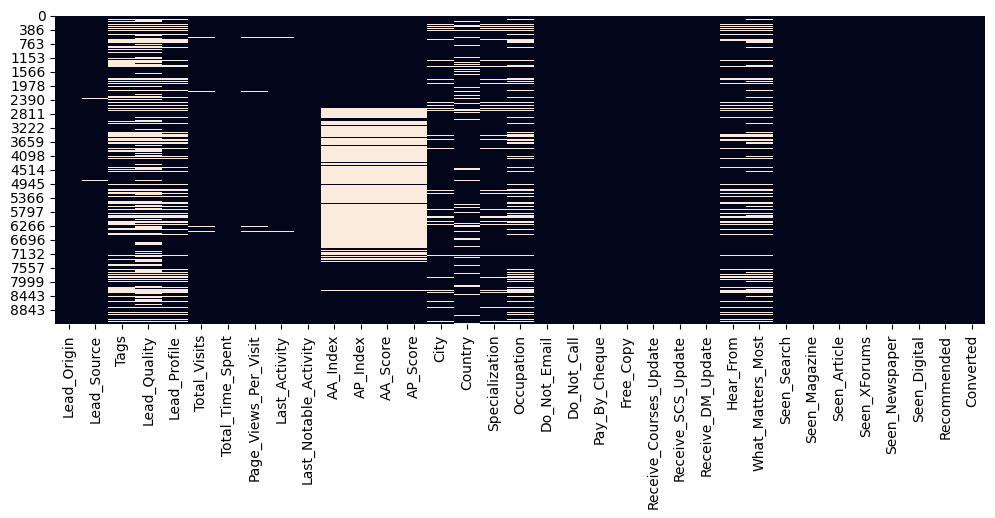

In [17]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isna(), cbar=False)
plt.show

Bright lines = location of missing values. Below is a function to group the missing values in one column together and see how they correlate to other columns' missing values.

**Function for visualizing missing values**

In [18]:
def null_map(sortby=''):
    plt.figure(figsize=(12,4))
    if sortby!='':
        sns.heatmap(df.isna().sort_values(sortby), cbar=False)
    else:
        sns.heatmap(df.isna(), cbar=False)
    plt.show

Group by Lead_Quality

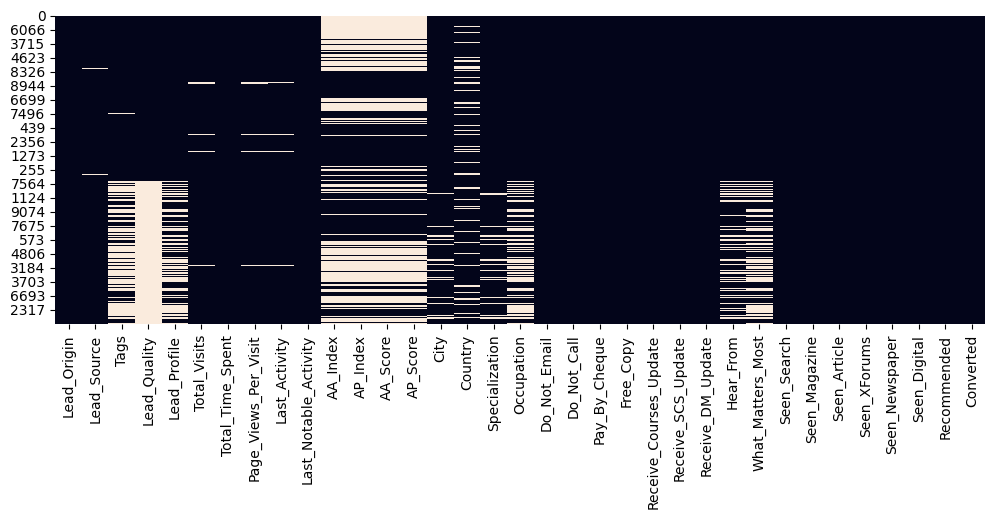

In [19]:
null_map('Lead_Quality')

We can observe that missing values in Lead_Quality seem to be related to the missing values in Tags, Lead_Profile, City, Country, Specialization, Occupation, Hear_From and What_Matters_Most. (Missing At Random - variable being missing depends on other observed variables in the dataset)

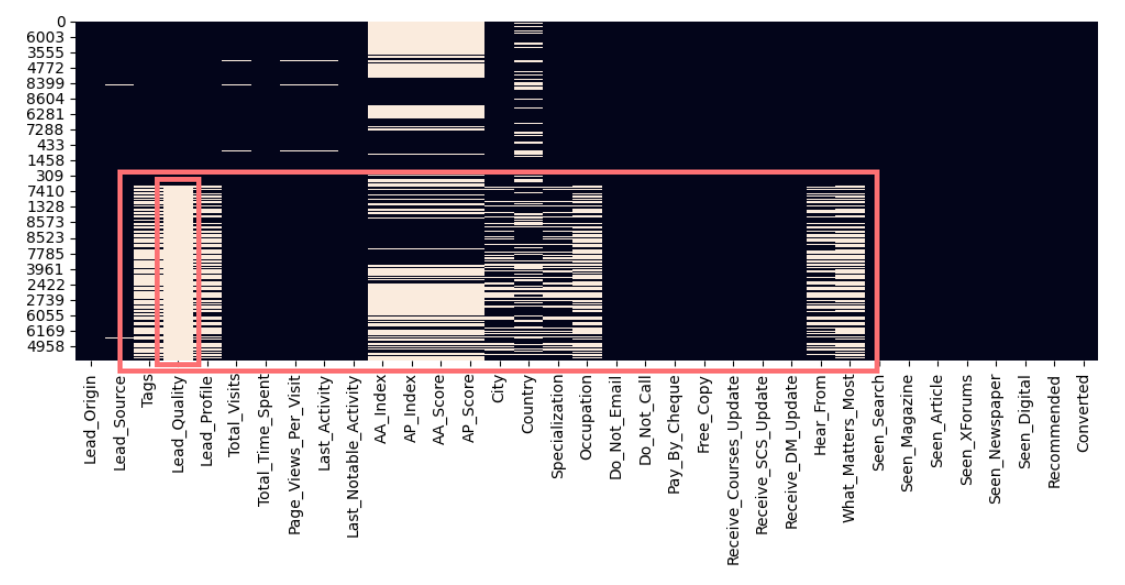

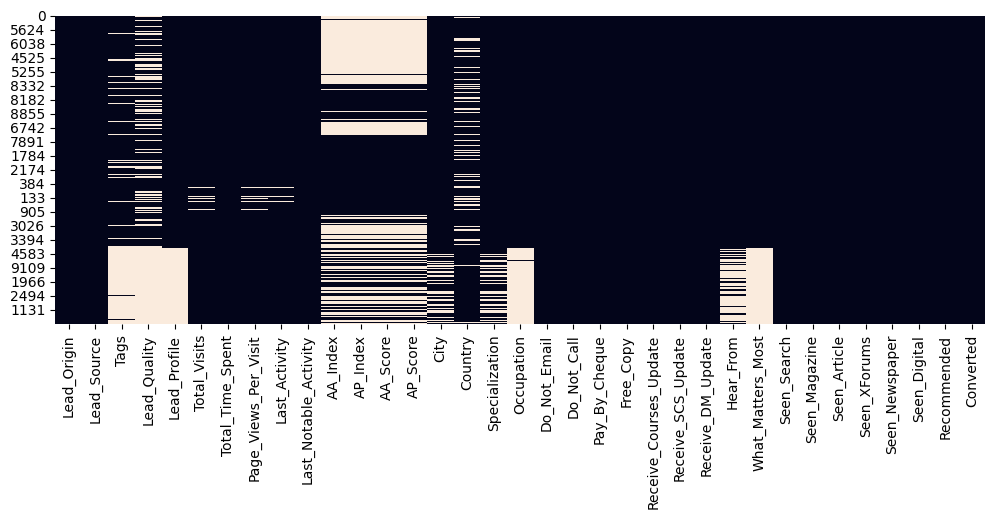

In [20]:
null_map('Lead_Profile')

We can also observe here that Lead_Profile have a perfect MAR relationship with Occupation and What_Matters_Most

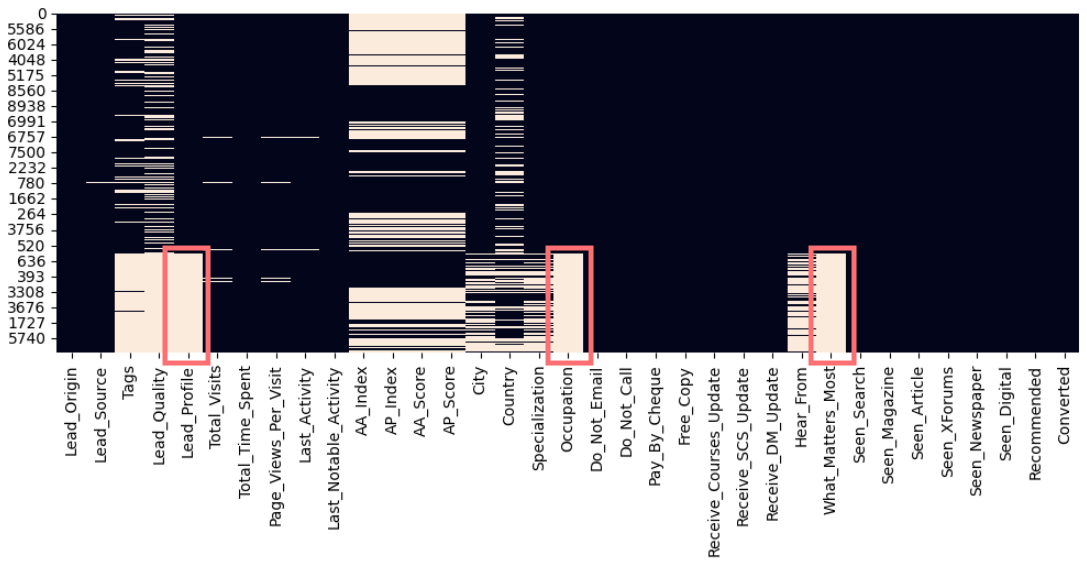

Now we have finished data quality check. Let's move on to preprocessing the data for EDA.

# 2. Data Cleaning

## Replace 'Select' with NaN

Some categorical columns that have the value 'Select', which is the default choice in a form. They do not provide any additional information and can be considered as missing values.

In [21]:
df = df.replace('Select', np.NaN)

Percentage of NaN in columns:

In [22]:
missing_percentage = df.isna().sum()/len(df)
missing_percentage[missing_percentage>=0.4]

Lead_Quality    0.465511
Lead_Profile    0.718809
AA_Index        0.441638
AP_Index        0.441638
AA_Score        0.441638
AP_Score        0.441638
Hear_From       0.749969
dtype: float64

In [23]:
high_NA = missing_percentage[missing_percentage>=0.4].index.tolist()

df.drop(columns=high_NA, inplace=True)

## Flag missing value as NA for categorical variables

Flag the missing value as XNA for EDA. This will help with investigate the reason for missingness and if they should be dropped or imputed, and what the approriate value for imputing should be.

In [24]:
# select columns with dtype string, fill missing values with NA
df[df.select_dtypes('object').columns] = df[df.select_dtypes('object').columns].fillna('XNA')

## Clean up names

- Fix spelling
- Group low occurence into one category
- Some categorical values have really long names. While not required, shorten them will help with legibility during EDA and for dummy encoding.

### Lead_Origin

Shorten category names

In [25]:
df.Lead_Origin = df.Lead_Origin.map({
    'Landing Page Submission'    : 'Landing Page',
    'API'                        : 'API',
    'Lead Add Form'              : 'Add Form',
    'Lead Import'                : 'Import',
    'Quick Add Form'             : 'Add Form'
})
df.Lead_Origin.value_counts()

Landing Page    4886
API             2498
Add Form         523
Import            52
Name: Lead_Origin, dtype: int64

### Lead_Source

In [26]:
df.Lead_Source.value_counts()

Google               2868
Direct Traffic       2543
Organic Search       1154
Olark Chat            673
Reference             410
Referral Sites        125
Welingak Website       73
Facebook               52
XNA                    33
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead_Source, dtype: int64

**change 'google' to 'Google'**

In [27]:
df.loc[df.Lead_Source=='google', 'Lead_Source'] = 'Google'

**Merge 'Facebook' and 'Social Media'**

In [28]:
df.loc[df.Lead_Source=='Facebook', 'Lead_Source'] = 'Social Media'

**Merge low occurences into 'Others'**

In [29]:
# lead source count
Lead_Source_count = df.Lead_Source.value_counts()

# low occurence category
low_occurence_source = Lead_Source_count[Lead_Source_count<30].index.tolist()

# group the low occurences
df.Lead_Source[df.Lead_Source.isin(low_occurence_source)] = 'Others'

**After cleaning**

In [30]:
df.Lead_Source.value_counts()

Google              2873
Direct Traffic      2543
Organic Search      1154
Olark Chat           673
Reference            410
Referral Sites       125
Welingak Website      73
Social Media          54
XNA                   33
Others                21
Name: Lead_Source, dtype: int64

### Tags

**Clean up and standardize tags**

In [31]:
def rename_tag(original, newname):
    df.Tags[df.Tags==original] = newname

In [32]:
# rename/shorten tags
tags_to_rename = [
    ('Will revert after reading the email', 'Revert after email'),
    ('Interested in other courses', 'Interested other courses'),
    ('Interested in Next batch', 'Interested next batch'),
    ('Interested  in full time MBA', 'Interested MBA'),
    ('Shall take in the next coming month', 'Next coming month'),
    ('Want to take admission but has financial problems', 'Financial problem'),
    ('number not provided', 'No number'),
    ('opp hangup', 'Hangup'),
    ('invalid number', 'Invalid number'),
    ('wrong number given', 'Wrong number'),
    ('Lost to EINS', 'Lost to EINS'),
    ('in touch with EINS','In touch EINS'),
    ('In confusion whether part time or DLP', 'In confusion'),
    ('switched off', 'Switched off'),
    ('Diploma holder (Not Eligible)','Diploma holder'),
    ('Already a student','Already a student'),
    ('Not doing further education', 'Not doing further edu'),
    ('Lost to Others','Lost to others'),
    ('Recognition issue (DEC approval)', 'Recognition issue'),
    ('University not recognized', 'Uni unrecognized')
]

for (original, newname) in tags_to_rename:
    rename_tag(original, newname)

# view current tags
df.Tags.unique()

array(['Interested other courses', 'Ringing', 'Revert after email', 'XNA',
       'Lost to EINS', 'In confusion', 'Busy', 'Switched off',
       'In touch EINS', 'Already a student', 'Diploma holder',
       'Graduation in progress', 'Closed by Horizzon', 'No number',
       'Hangup', 'Not doing further edu', 'Invalid number',
       'Wrong number', 'Interested MBA', 'Still Thinking',
       'Lost to others', 'Next coming month', 'Lateral student',
       'Interested next batch', 'Recognition issue', 'Financial problem',
       'Uni unrecognized'], dtype=object)

Group 'Invalid number', 'Wrong number', 'Hangup', 'No number', 'Switched off' into 'Cannot contact':

In [33]:
df.Tags[df.Tags.isin(['Wrong number', 'Hangup', 'No number','Switched off','Invalid number'])] = 'Cannot contact'

Group low occurence into one:

In [34]:
tags_count = df.Tags.value_counts()

df.Tags[df.Tags.isin(tags_count[tags_count<=30].index.tolist())] = 'Others'

After cleaning

In [35]:
df.Tags.value_counts()

XNA                         2402
Revert after email          1924
Ringing                     1143
Interested other courses     473
Cannot contact               429
Already a student            407
Closed by Horizzon           347
Busy                         186
Lost to EINS                 172
Not doing further edu        143
Interested MBA               116
Graduation in progress       108
Diploma holder                60
Others                        49
Name: Tags, dtype: int64

### Total_Visits, Total_Time_Spent, Page_Views_Per_Visit

#### Flag null values

In [36]:
df[['Total_Visits', 'Total_Time_Spent', 'Page_Views_Per_Visit']].isna().sum()

Total_Visits            137
Total_Time_Spent          0
Page_Views_Per_Visit    137
dtype: int64

Flag the null values

In [37]:
df[['Total_Visits_NA', 'Page_Views_Per_Visit_NA']] = df[['Total_Visits', 'Page_Views_Per_Visit']].isna()

### Last_Activity

In [38]:
df.Last_Activity.value_counts()

Email Opened                    3043
SMS Sent                        2427
Page Visited on Website          635
Olark Chat Conversation          474
Converted to Lead                428
Email Bounced                    303
Email Link Clicked               225
Form Submitted on Website        116
XNA                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64

Group low occurence

In [39]:
# low occurence vategory
low_occurence = df.Last_Activity.value_counts()[df.Last_Activity.value_counts()<=30].index.tolist()

# group the low occurences
df.Last_Activity[df.Last_Activity.isin(low_occurence)] = 'Others'

After cleaning

In [40]:
df.Last_Activity.value_counts()

Email Opened                 3043
SMS Sent                     2427
Page Visited on Website       635
Olark Chat Conversation       474
Converted to Lead             428
Email Bounced                 303
Email Link Clicked            225
Form Submitted on Website     116
XNA                           103
Unreachable                    93
Unsubscribed                   61
Others                         51
Name: Last_Activity, dtype: int64

### Last_Notable_Activity

In [41]:
df.Last_Notable_Activity.value_counts()

Modified                        2847
Email Opened                    2506
SMS Sent                        1887
Page Visited on Website          313
Email Link Clicked               142
Olark Chat Conversation          105
Email Bounced                     59
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last_Notable_Activity, dtype: int64

Group low occurence

In [42]:
# low occurence vategory
low_occurence = df.Last_Notable_Activity.value_counts()[df.Last_Notable_Activity.value_counts()<=30].index.tolist()

# group the low occurences
df.Last_Notable_Activity[df.Last_Notable_Activity.isin(low_occurence)] = 'Others'

In [43]:
df.Last_Notable_Activity.value_counts()

Modified                   2847
Email Opened               2506
SMS Sent                   1887
Page Visited on Website     313
Email Link Clicked          142
Olark Chat Conversation     105
Email Bounced                59
Unsubscribed                 47
Unreachable                  32
Others                       21
Name: Last_Notable_Activity, dtype: int64

### City, Country

View value counts of city and country

In [44]:
df.City.value_counts()

Mumbai                         3209
XNA                            2411
Thane & Outskirts               745
Other Cities                    685
Other Cities of Maharashtra     455
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [45]:
df.Country.value_counts()

India                   6492
XNA                     1180
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [46]:
# low occurence vategory
low_occurence = df.Country.value_counts()[df.Country.value_counts()<=30].index.tolist()

# group the low occurences
df.Country[df.Country.isin(low_occurence)] = 'Others'

In [47]:
df.Country.value_counts()

India                   6492
XNA                     1180
Others                   165
United States             69
United Arab Emirates      53
Name: Country, dtype: int64

### Specialization

In [48]:
df.Specialization.value_counts()

XNA                                  2190
Finance Management                    957
Human Resource Management             831
Marketing Management                  805
Operations Management                 492
Business Administration               398
IT Projects Management                366
Supply Chain Management               348
Banking, Investment And Insurance     333
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### Occupation

In [49]:
df.Occupation.value_counts()

Unemployed              5150
XNA                     1951
Working Professional     639
Student                  185
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

Group low occurence into Others

In [50]:
df.Occupation[df.Occupation.isin(['Housewife','Businessman','Other'])] = 'Others'

### What_Matters_Most

In [51]:
df.What_Matters_Most.value_counts()

Better Career Prospects      5986
XNA                          1970
Flexibility & Convenience       2
Other                           1
Name: What_Matters_Most, dtype: int64

This feature should be droped also, since they only contain one choice 'Better Career Prospects' if not missing.

In [52]:
df.head()

,Lead_Origin,Lead_Source,Tags,Total_Visits,Total_Time_Spent,Page_Views_Per_Visit,Last_Activity,Last_Notable_Activity,City,Country,Specialization,Occupation,Do_Not_Email,Do_Not_Call,Pay_By_Cheque,Free_Copy,Receive_Courses_Update,Receive_SCS_Update,Receive_DM_Update,What_Matters_Most,Seen_Search,Seen_Magazine,Seen_Article,Seen_XForums,Seen_Newspaper,Seen_Digital,Recommended,Converted,Total_Visits_NA,Page_Views_Per_Visit_NA
0,API,Olark Chat,Interested other courses,0.0,0,0.0,Page Visited on Website,Modified,XNA,XNA,XNA,Unemployed,No,No,No,No,No,No,No,Better Career Prospects,No,No,No,No,No,No,No,0,False,False
1,API,Organic Search,Ringing,5.0,674,2.5,Email Opened,Email Opened,XNA,India,XNA,Unemployed,No,No,No,No,No,No,No,Better Career Prospects,No,No,No,No,No,No,No,0,False,False
2,Landing Page,Direct Traffic,Revert after email,2.0,1532,2.0,Email Opened,Email Opened,Mumbai,India,Business Administration,Student,No,No,No,Yes,No,No,No,Better Career Prospects,No,No,No,No,No,No,No,1,False,False
3,Landing Page,Direct Traffic,Ringing,1.0,305,1.0,Unreachable,Modified,Mumbai,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Better Career Prospects,No,No,No,No,No,No,No,0,False,False
4,Landing Page,Google,Revert after email,2.0,1428,1.0,Converted to Lead,Modified,Mumbai,India,XNA,Unemployed,No,No,No,No,No,No,No,Better Career Prospects,No,No,No,No,No,No,No,1,False,False


### Binary variables

In [53]:
convert_binary = lambda x: x.map({'No': 0, 'Yes':1})

In [54]:
df.loc[:,'Do_Not_Email':'Receive_DM_Update'] = df.loc[:,'Do_Not_Email':'Receive_DM_Update'].apply(convert_binary)

df.loc[:,'Do_Not_Email':'Receive_DM_Update'].sum()

C:\Users\nguye_5159g\AppData\Local\Temp\ipykernel_57108\397034408.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Do_Not_Email':'Receive_DM_Update'] = df.loc[:,'Do_Not_Email':'Receive_DM_Update'].apply(convert_binary)


Do_Not_Email               696
Do_Not_Call                  2
Pay_By_Cheque                0
Free_Copy                 2888
Receive_Courses_Update       0
Receive_SCS_Update           0
Receive_DM_Update            0
dtype: int64

In [55]:
df.loc[:, 'Seen_Search': 'Recommended'] = df.loc[:, 'Seen_Search': 'Recommended'].apply(convert_binary)
df.loc[:, 'Seen_Search': 'Recommended'].sum()

C:\Users\nguye_5159g\AppData\Local\Temp\ipykernel_57108\4103787699.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Seen_Search': 'Recommended'] = df.loc[:, 'Seen_Search': 'Recommended'].apply(convert_binary)


Seen_Search       14
Seen_Magazine      0
Seen_Article       2
Seen_XForums       1
Seen_Newspaper     1
Seen_Digital       4
Recommended        7
dtype: int64

All the columns above except Do_Not_Email and Free_Copy provide very little information (All most all is 0) and should be dropped.

In [56]:
# drop the above columns
df = df.drop(columns=['Do_Not_Call', 'Pay_By_Cheque', 'Receive_Courses_Update', 'Receive_SCS_Update','Receive_DM_Update','What_Matters_Most'])

df = df.drop(columns=df.loc[:, 'Seen_Search': 'Recommended'].columns)

## Export

In [57]:
df.to_csv('leads_cleaned.csv', index=False)

# 3. EDA

## 3.1 Univariate

### Target

<Axes: xlabel='Converted', ylabel='count'>

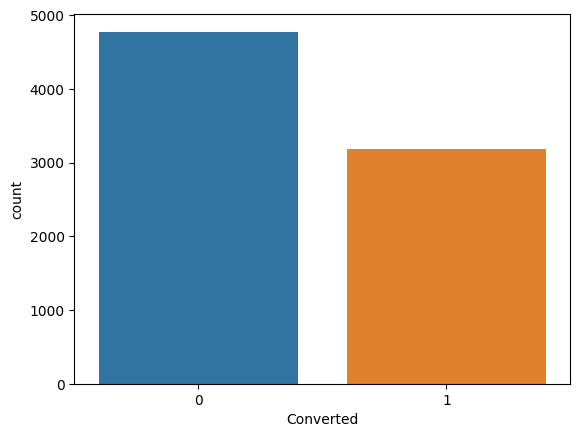

In [58]:
sns.countplot(x=df.Converted)

In [59]:
df.Converted.value_counts(normalize=True)

0    0.600075
1    0.399925
Name: Converted, dtype: float64

The ratio of convert vs non-convert is 40%:60%

### Summary

In [60]:
# numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Visits,7822.0,4.009460,5.016726,0.0,2.0,3.0,5.0,251.0
Total_Time_Spent,7959.0,566.193240,551.563569,0.0,102.0,332.0,1042.5,2272.0
Page_Views_Per_Visit,7822.0,2.749776,2.091107,0.0,1.5,2.0,4.0,55.0
Do_Not_Email,7959.0,0.087448,0.282508,0.0,0.0,0.0,0.0,1.0
Free_Copy,7959.0,0.362860,0.480855,0.0,0.0,0.0,1.0,1.0
Converted,7959.0,0.399925,0.489913,0.0,0.0,0.0,1.0,1.0


Metrics for landing page visit (Total visits, total time spent, page views per visit) have some extreme values/outliers.

In [61]:
# categorical variables
df.describe(include='object').T

,count,unique,top,freq
Lead_Origin,7959,4,Landing Page,4886
Lead_Source,7959,10,Google,2873
Tags,7959,14,XNA,2402
Last_Activity,7959,12,Email Opened,3043
Last_Notable_Activity,7959,10,Modified,2847
City,7959,7,Mumbai,3209
Country,7959,5,India,6492
Specialization,7959,19,XNA,2190
Occupation,7959,5,Unemployed,5150


### Lead_Origin, Lead_Source, Tags

In [62]:
# function to see the distribution and convert rate for each category
def eda_category(feature):
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(12,4))
    
    plt.suptitle(feature)
    data = df.groupby(feature).mean(numeric_only=True)[['Converted']].reset_index()
    order = data.sort_values('Converted', ascending=False)[feature]
    sns.countplot(df, x=feature, hue='Converted', order=order, ax=ax1)
    ax1.set_title('Category distribution')
    ax1.set_xticklabels(labels = order, rotation = 45, ha='right')

    
    sns.barplot(data=data, x=feature, y='Converted', order=order, ax=ax2)
    ax2.set_title('Convert rate')
    ax2.set_xticklabels(labels = order, rotation = 45, ha='right')
    plt.show()


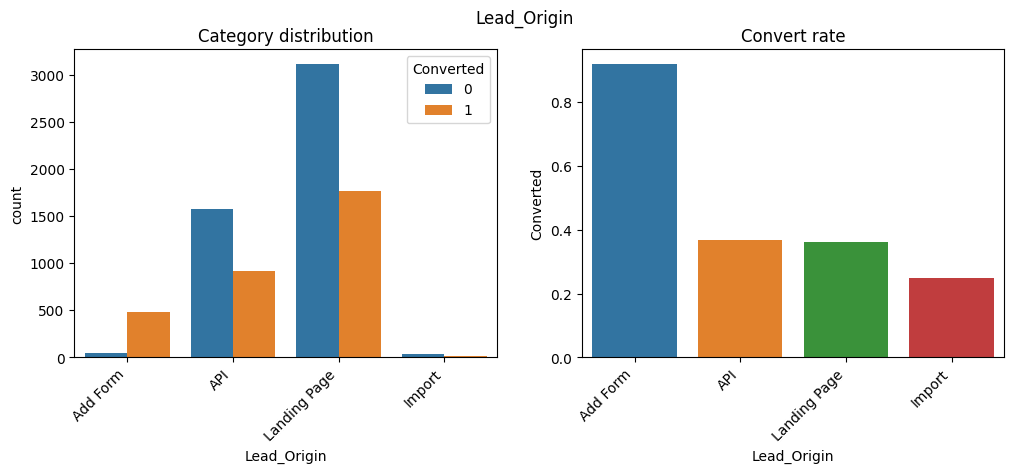

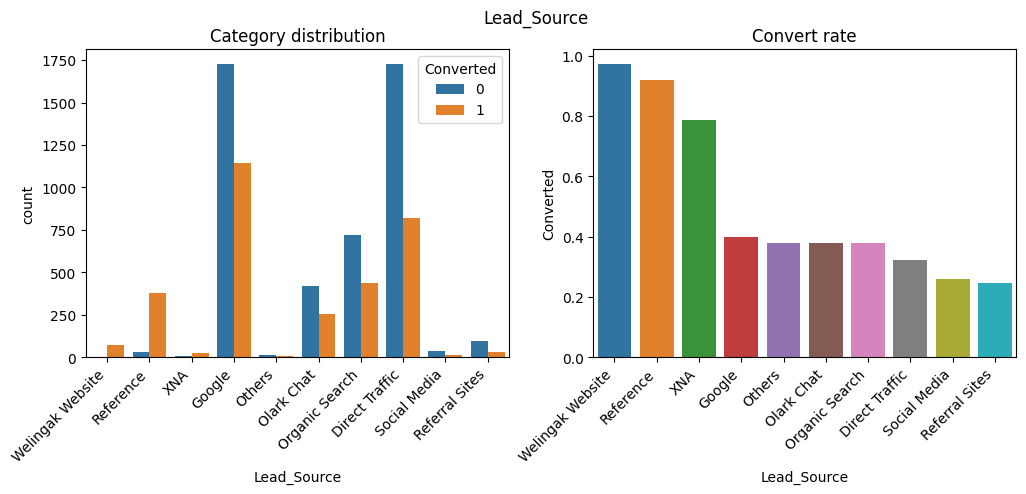

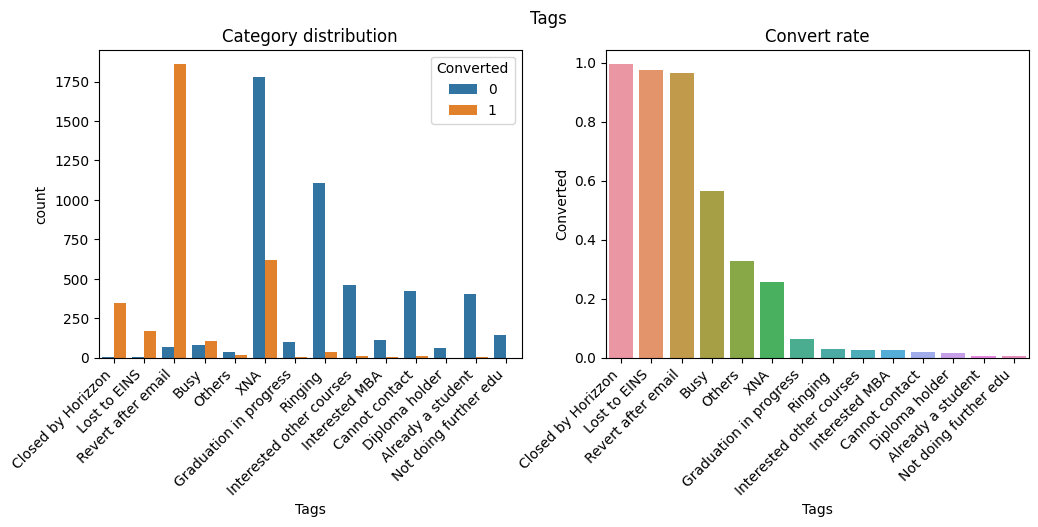

In [63]:
for feature in ['Lead_Origin', 'Lead_Source', 'Tags', ]:
    eda_category(feature)

- **Lead Source:** Most of the leads are from Google and Direct Traffic yet they have a slightly below average convert rate. Convert rate for leads from Welingka and Reference are the highest while Social Media and Referral Sites are lowest.

- **Tags** seems to be a good indicator of convert chance, since it indicate the current status/interest of a lead. We can see a very distinct convert rate between different Tags. 
>- Some tags like 'Revert after email' have near 100% convert rate. Looks like the email interaction effectively educated the leads about the product or service being offered, addressed any questions or concerns they may have, and provided them with the confidence/motivation to purchase.
>- Some tags like 'Cannot Contact', 'Interest in other courses',... have very low rate, as expected.


### Total_Visits, Total_Time_Spent, Page_Views_Per_Visit

In [64]:
def eda_numerical(feature):
    fig, (ax1,ax2) = plt.subplots(nrows=2,  height_ratios = (1,4), figsize=(6,4))
    sns.boxplot(x=df[feature], y=df.Converted.astype('str'),showmeans=True, ax=ax1)
    sns.kdeplot(df, x=feature, hue='Converted',ax=ax2)
    plt.tight_layout()
    plt.show()

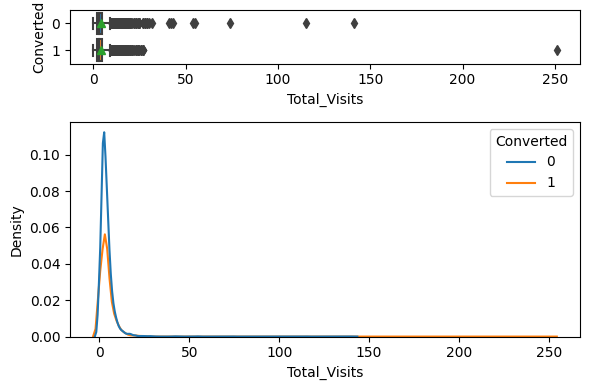

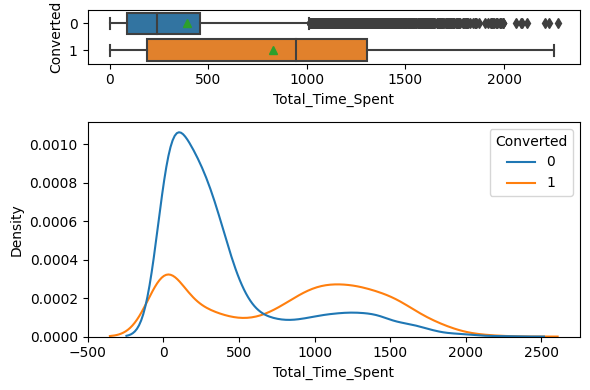

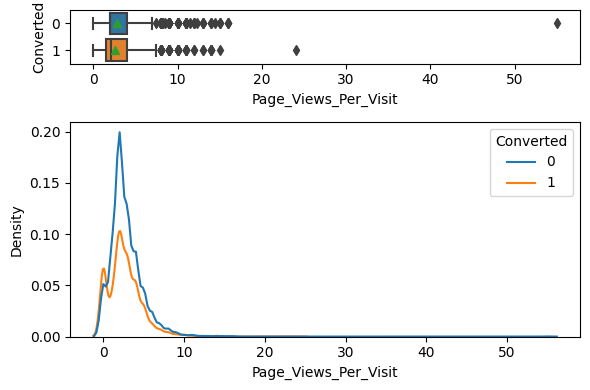

In [65]:
for feature in ['Total_Visits', 'Total_Time_Spent', 'Page_Views_Per_Visit']:
    eda_numerical(feature)

We can see that there are extreme values in Total Visits and Page Views Per Visit

**Outliers**

How are the outliers in Total Visits like?

In [66]:
df[df.Total_Visits>50]

,Lead_Origin,Lead_Source,Tags,Total_Visits,Total_Time_Spent,Page_Views_Per_Visit,Last_Activity,Last_Notable_Activity,City,Country,Specialization,Occupation,Do_Not_Email,Free_Copy,Converted,Total_Visits_NA,Page_Views_Per_Visit_NA
2190,Landing Page,Direct Traffic,XNA,55.0,297,55.00,Page Visited on Website,Modified,Other Cities,India,IT Projects Management,Unemployed,1,1,0,False,False
2322,Landing Page,Direct Traffic,XNA,141.0,755,6.71,Page Visited on Website,Page Visited on Website,Mumbai,India,Human Resource Management,XNA,1,1,0,False,False
5283,Landing Page,Direct Traffic,Not doing further edu,74.0,1209,12.33,Page Visited on Website,Page Visited on Website,Thane & Outskirts,India,XNA,Unemployed,1,0,0,False,False
5538,Landing Page,Referral Sites,XNA,54.0,1280,4.50,SMS Sent,SMS Sent,Mumbai,India,XNA,XNA,0,0,0,False,False
5608,Landing Page,Referral Sites,XNA,115.0,187,8.21,Page Visited on Website,Page Visited on Website,Mumbai,India,Rural and Agribusiness,Unemployed,1,0,0,False,False
6102,Landing Page,Direct Traffic,Interested other courses,251.0,49,1.48,Page Visited on Website,Page Visited on Website,Mumbai,India,Supply Chain Management,Unemployed,0,1,1,False,False


In [67]:
df[df.Page_Views_Per_Visit>15]

,Lead_Origin,Lead_Source,Tags,Total_Visits,Total_Time_Spent,Page_Views_Per_Visit,Last_Activity,Last_Notable_Activity,City,Country,Specialization,Occupation,Do_Not_Email,Free_Copy,Converted,Total_Visits_NA,Page_Views_Per_Visit_NA
125,API,Referral Sites,XNA,16.0,53,16.0,Olark Chat Conversation,Modified,XNA,India,XNA,XNA,0,0,0,False,False
2190,Landing Page,Direct Traffic,XNA,55.0,297,55.0,Page Visited on Website,Modified,Other Cities,India,IT Projects Management,Unemployed,1,1,0,False,False
5164,Landing Page,Direct Traffic,XNA,16.0,103,16.0,Page Visited on Website,Modified,Mumbai,India,Finance Management,XNA,1,1,0,False,False
5495,Landing Page,Google,Already a student,16.0,462,16.0,Page Visited on Website,Modified,Other Cities of Maharashtra,India,IT Projects Management,Unemployed,1,1,0,False,False
6805,API,Organic Search,XNA,24.0,1527,24.0,Page Visited on Website,Modified,XNA,Others,XNA,XNA,0,0,1,False,False


Some of the outliers do not make sense. Eg: the lead that visited 55 times, each time view 55 pages or the one has 251 visit but total time spent is 49 (seconds?). These values should be capped.

<Axes: xlabel='Total_Visits'>

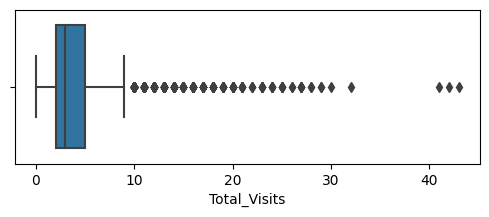

In [68]:
plt.figure(figsize=(6,2))
sns.boxplot(df.query('Total_Visits < 50'), x='Total_Visits')

Total visits can be capped at 50.

<Axes: xlabel='Page_Views_Per_Visit'>

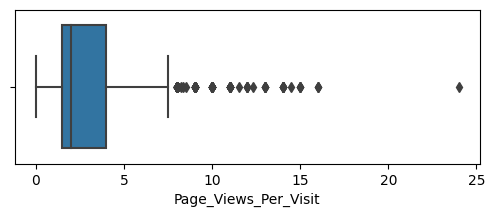

In [ ]:
plt.figure(figsize=(6,2))
sns.boxplot(df.query('Page_Views_Per_Visit < 30'), x='Page_Views_Per_Visit')

Page_Views_Per_Visit can be capped at 16.

**Null values in Total_Visits**

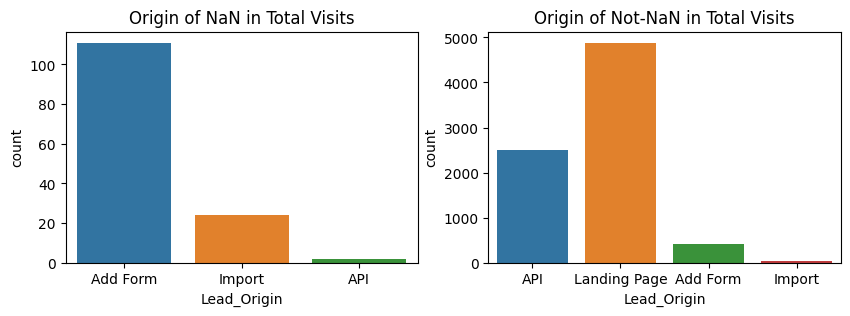

In [70]:
# origin of NaN vs Not-NaN
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(10,3))
sns.countplot(df[df.Total_Visits.isna()], x='Lead_Origin', ax=ax1)
ax1.set_title('Origin of NaN in Total Visits')
sns.countplot(df[~df.Total_Visits.isna()], x='Lead_Origin', ax=ax2)
ax2.set_title('Origin of Not-NaN in Total Visits')
plt.show()

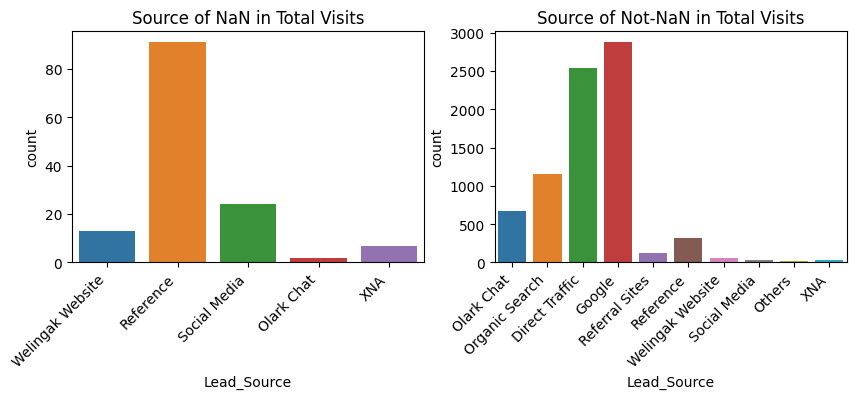

In [71]:
# source of NaN vs Not-NaN
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(10,3))
sns.countplot(df[df.Total_Visits.isna()], x='Lead_Source', ax=ax1)
ax1.set_title('Source of NaN in Total Visits')
ax1.set_xticklabels(labels = ax1.get_xticklabels(), rotation = 45, ha='right')

sns.countplot(df[~df.Total_Visits.isna()], x='Lead_Source', ax=ax2)
ax2.set_title('Source of Not-NaN in Total Visits')
ax2.set_xticklabels(labels = ax2.get_xticklabels(), rotation = 45, ha='right')

plt.show()

**Conclusion:**
- We can see that the null value in Total Visits are originated from Add Form and Import and not through the landing page.

### Last_Activity, Last_Notable_Activity

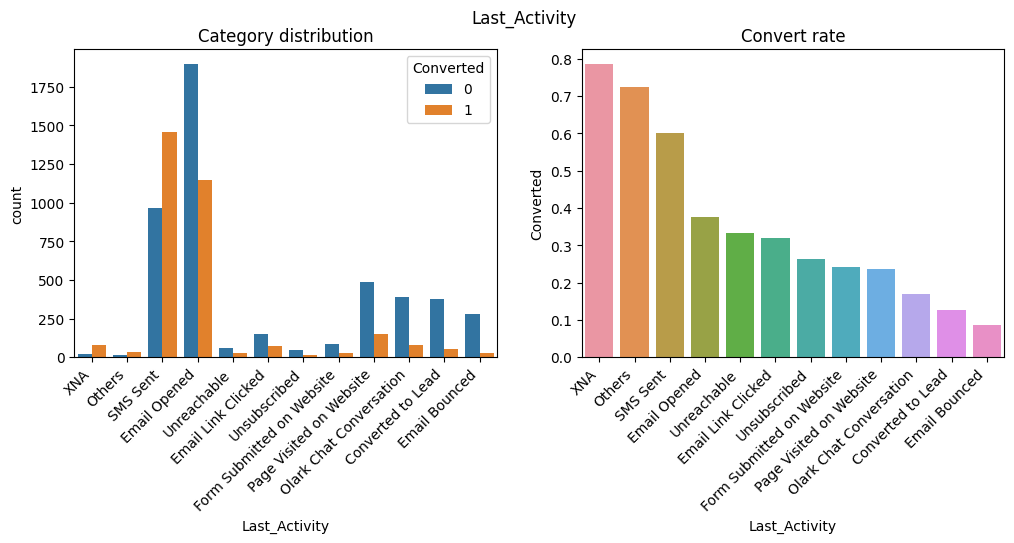

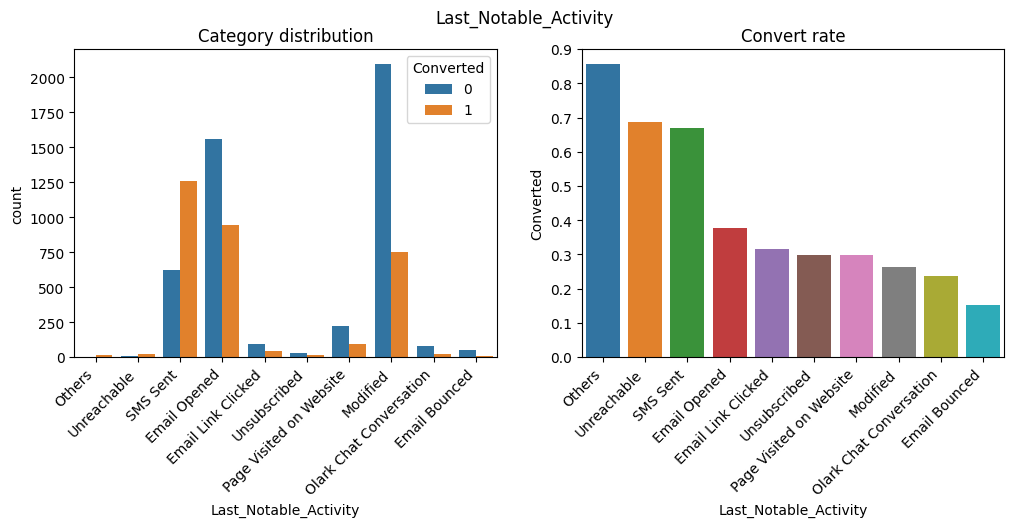

In [72]:
for feature in ['Last_Activity', 'Last_Notable_Activity']:
    eda_category(feature)

- 'SMS sent' and 'Email opened' are the 2 most common Last activity. The former has significantly higher convert rate than the latter.

### City, Country

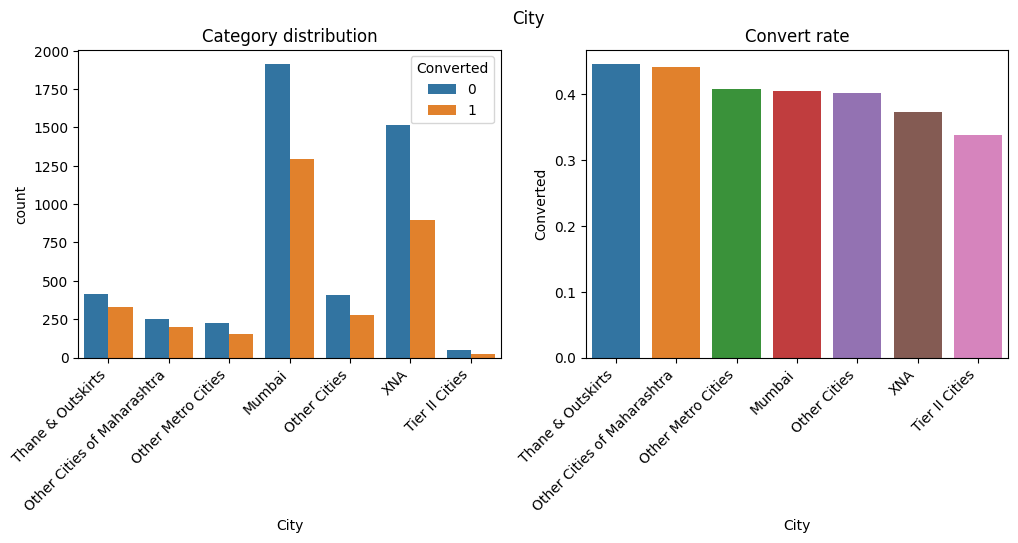

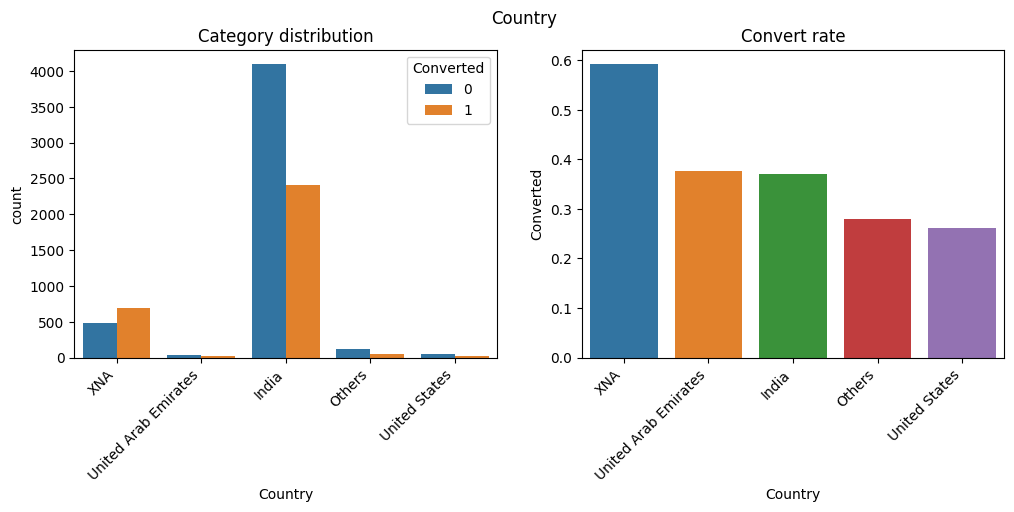

In [73]:
for feature in ['City', 'Country']:
    eda_category(feature)

- The majority of leads are from Mumbai, and India. 
- City doesn't seems to be a good indicator, as the convert rate among different cities are very similar. 
- Country doesn't provide much information either, though it worth noting that the missing values in Country have significantly higher convert rate than the rest.

In [74]:
df.Lead_Origin[df.City=='XNA'].value_counts()

API             2003
Add Form         291
Landing Page     116
Import             1
Name: Lead_Origin, dtype: int64

In [75]:
df.Lead_Origin[df.Country=='XNA'].value_counts()

API             596
Add Form        496
Import           52
Landing Page     36
Name: Lead_Origin, dtype: int64

The majority of missing values in Country were acquired through API and Add Form, which might not have tracked Country or was left default as 'Select'.

### Specialization, Occupation

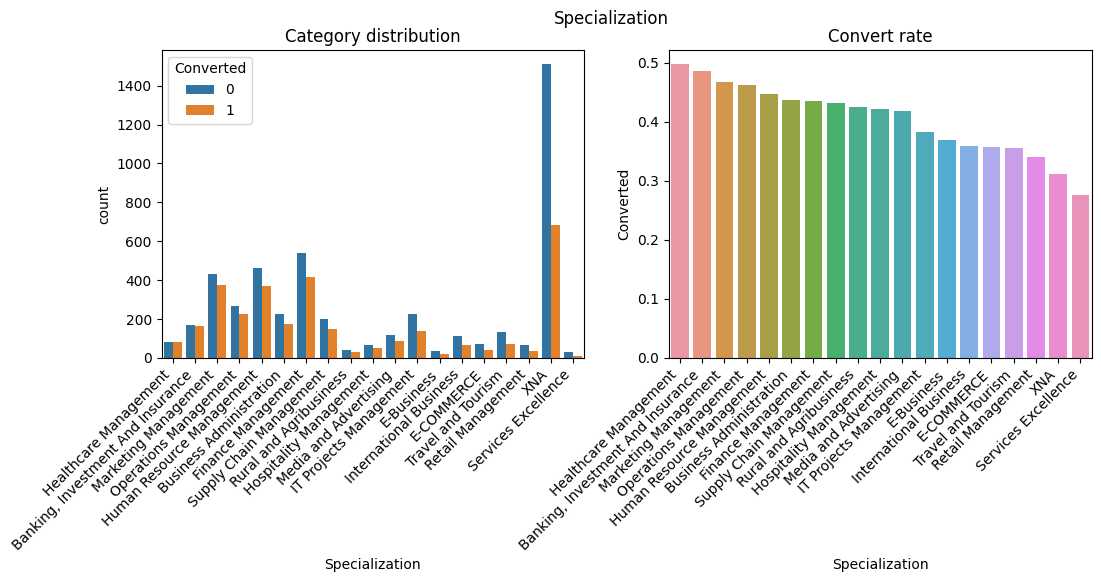

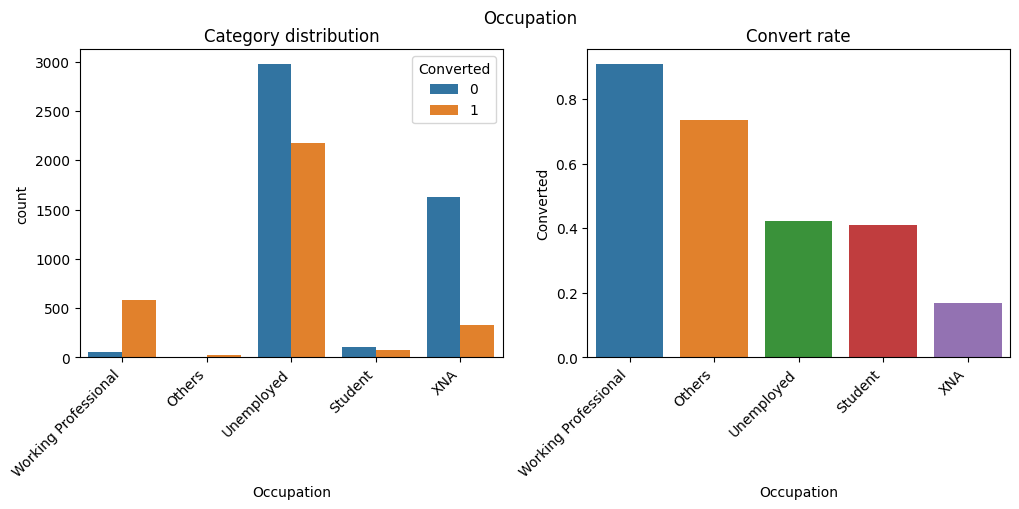

In [76]:
for feature in ['Specialization', 'Occupation']:
    eda_category(feature)

Leads in Health care, Banking/Investment and Marketing, and currently Working Professional have highest convert rate while the missing value/'Select' have the lowest rate.

### Do_Not_Email, Free_Copy, Hear_From

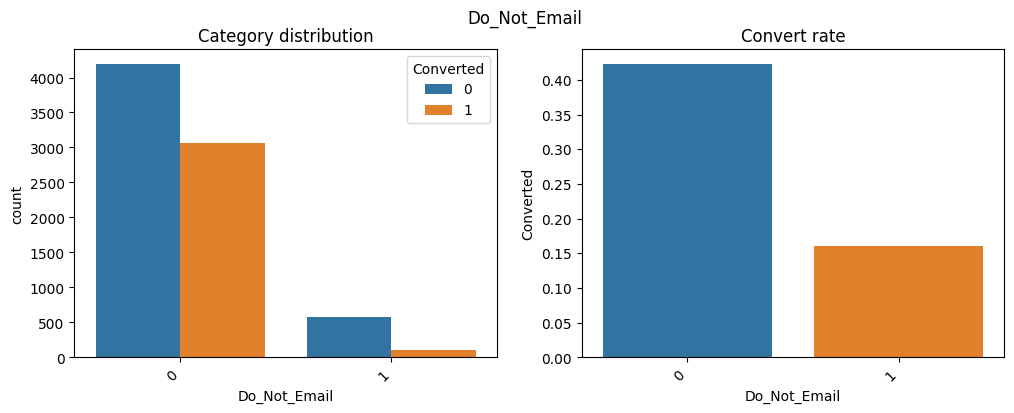

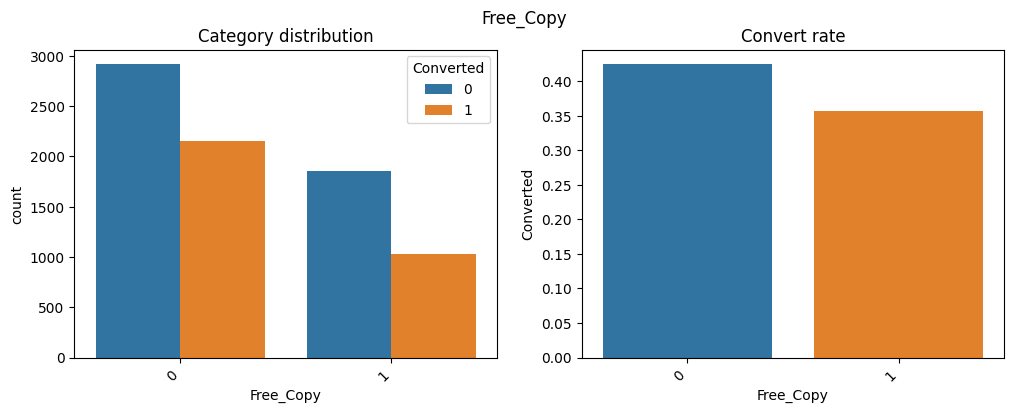

In [77]:
for feature in ['Do_Not_Email','Free_Copy']:
    eda_category(feature)

## 3.2 Multivariate

### Total_Visits, Total_Time_Spent, Page_Views_Per_Visit

<Axes: >

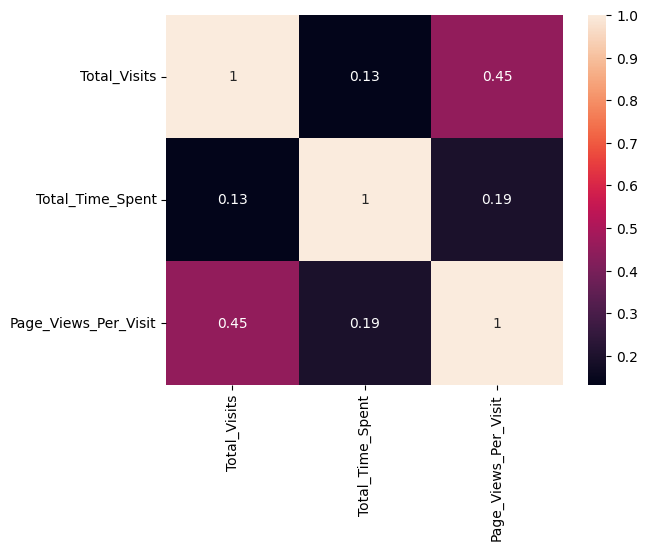

In [78]:
sns.heatmap(df[['Total_Visits', 'Total_Time_Spent', 'Page_Views_Per_Visit']].corr(), annot=True)

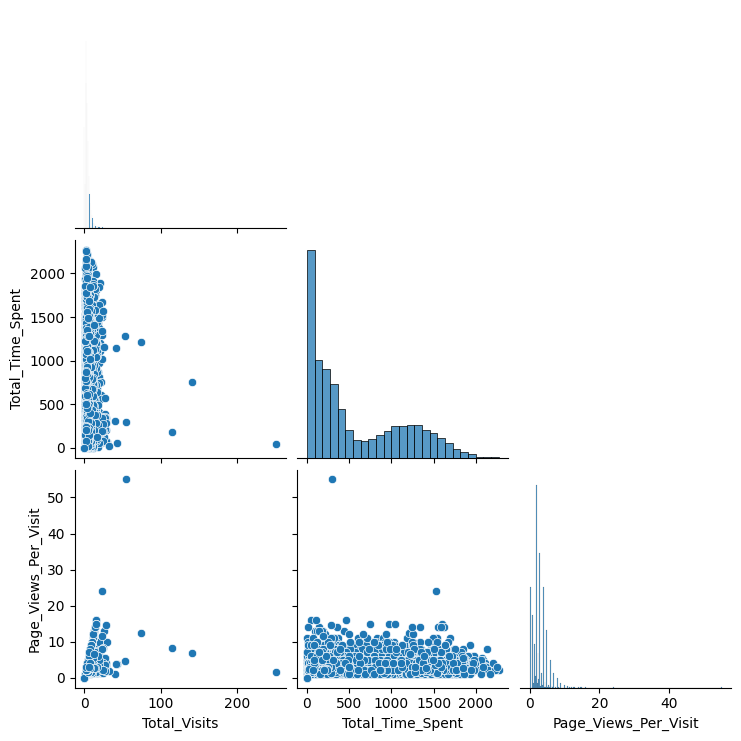

In [79]:
sns.pairplot(df[['Total_Visits', 'Total_Time_Spent', 'Page_Views_Per_Visit']], corner=True)

**Null value in Total visits and Page views per visits**

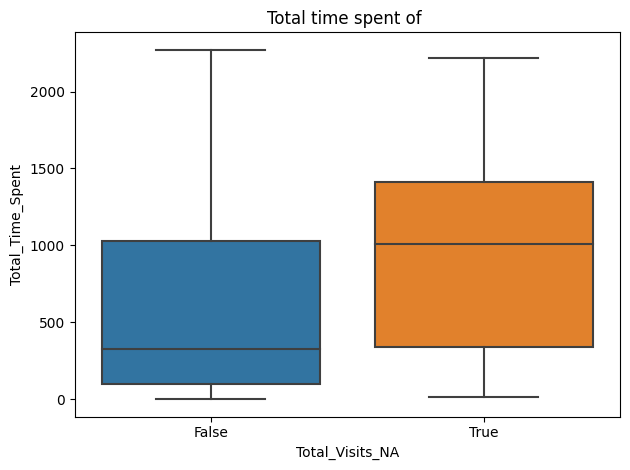

In [81]:
sns.boxplot(df, y='Total_Time_Spent', x='Total_Visits_NA')
plt.title('Total time spent of ')
plt.tight_layout()

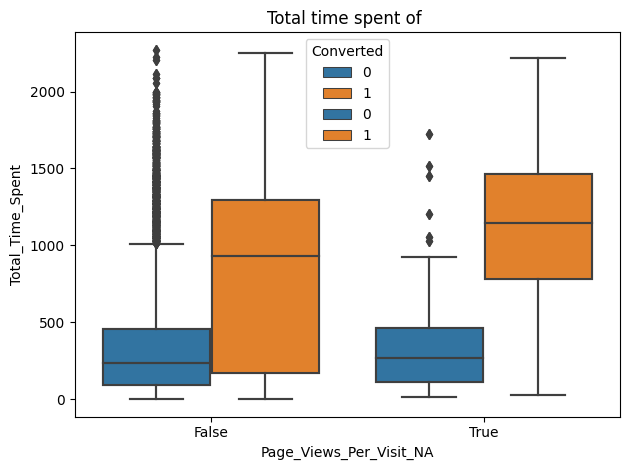

In [82]:
sns.boxplot(df, y='Total_Time_Spent', x='Total_Visits_NA', hue='Converted')
sns.boxplot(df, y='Total_Time_Spent', x='Page_Views_Per_Visit_NA', hue='Converted')
plt.title('Total time spent of ')
plt.tight_layout()

### Last_Activity, Last_Notable_Activity

In [83]:
def eda_heatmap(data, group_y, group_x, value = 'Converted', aggfunc = 'mean',  
                figsize = (8,6), annot=True, v_range = (0.00,1), plot_title = ''):
    df_hm = pd.pivot_table(data, columns = group_x, index = group_y, values = value, aggfunc= aggfunc)

    
    cmap = plt.get_cmap('Oranges')
    plt.figure(figsize=figsize)
    sns.heatmap(data=df_hm, vmin = v_range[0], vmax = v_range[1],cmap = cmap, annot=annot, fmt='.2%', annot_kws={"size": 8})
    plt.yticks(rotation=0)
    plt.title(plot_title if len(plot_title)>0 else f'{group_y} x {group_x}', size = 10, y=1.1)

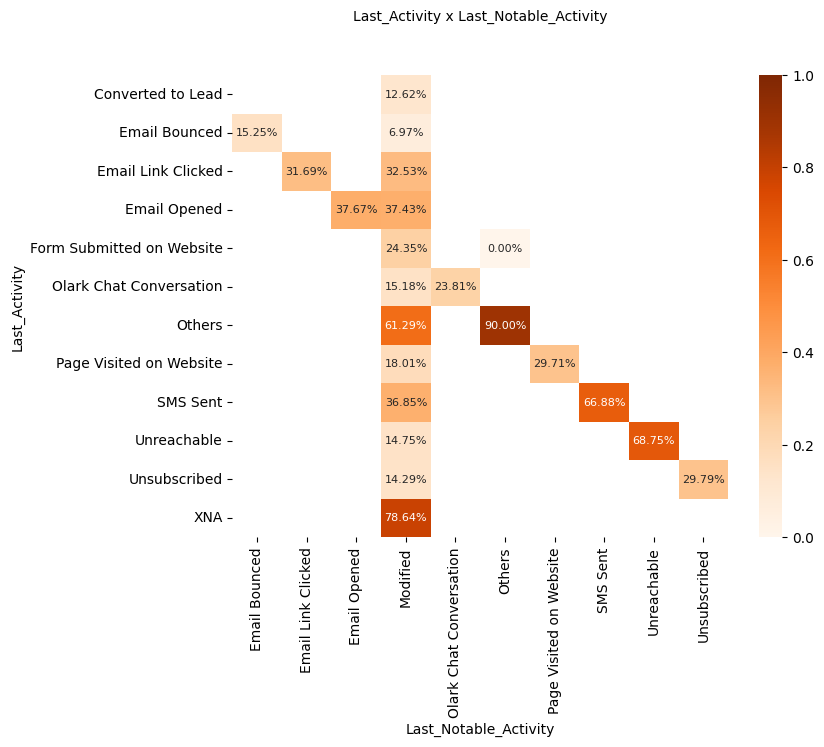

In [84]:
eda_heatmap(df, 'Last_Activity', 'Last_Notable_Activity')

## 3.3 EDA Conclusion

- There are extreme values in Total Visit and Total Time Spent
- Some important features are lead source, tags, total time spent
- There's not much different in convert rate among different categories in City, Country.
- Occupation: Working professional has the highest convert rate but makes up a very small portion. The largest portion is Unemployment.
- Last_Activity, Last_Notable_Activity seem to be overlapped a lot.
- Other categorical variables with multiple categories can be converted to WOE.

# 4. Data Processing for modelling

In [85]:
df = pd.read_csv('leads_cleaned.csv')

## 4.1 Drop unnecessary columns

- Drop **'Total_Visits_NA','Page_Views_Per_Visit_NA'** becausen it's no longer needed

In [86]:
df.drop(columns = ['Total_Visits_NA','Page_Views_Per_Visit_NA'], inplace=True)

## 4.2 Treat outlier

Cap the outliers as detected during EDA

In [87]:
# cap Total_Visits at 50
df.Total_Visits[df.Total_Visits>50] = 50

# cap Page_Views_Per_Visit at 16
df.Page_Views_Per_Visit[df.Page_Views_Per_Visit>16] = 16

## 4.3 Treat missing values in numerical features

### Missing values in 'Total_Visits', 'Page_Views_Per_Visit'

In [88]:
df[['Total_Visits', 'Total_Time_Spent', 'Page_Views_Per_Visit']][df.Total_Visits.isna()].head(10)

,Total_Visits,Total_Time_Spent,Page_Views_Per_Visit
74,NaN,1096,NaN
76,NaN,705,NaN
78,NaN,346,NaN
84,NaN,1007,NaN
116,NaN,1111,NaN
129,NaN,986,NaN
130,NaN,889,NaN
173,NaN,1240,NaN
175,NaN,458,NaN
176,NaN,1060,NaN


Analytics tools may not track Visit count correctly if the visit is from reference/affiliate link but it still tracks the time spent on the site. We will extrapolate the missing total visits from Total_Time_Spent

#### Impute Total_Visits
total_visits = total_time_spent / (mean time spent per visit)

In [89]:
# mean time spent per visit for Converted
(df.Total_Time_Spent[df.Converted==1]/df.Total_Visits[df.Converted==1]).mean()

290.84699783780366

In [90]:
# impute nan in Total_Visits for Converted = Total_Time_Spent/290
df.Total_Visits[df.Converted==1] = df.Total_Visits[df.Converted==1].fillna(df.Total_Time_Spent[df.Converted==1]/290)

In [91]:
# mean time spent per visit for Non-converted
(df.Total_Time_Spent[df.Converted==0]/df.Total_Visits[df.Converted==0]).mean()

150.81591101841173

In [92]:
# impute nan in Total_Visits for Non-converted = Total_Time_Spent/150
df.Total_Visits[df.Converted==0] = df.Total_Visits[df.Converted==0].fillna(df.Total_Time_Spent[df.Converted==0]/150)

#### Impute Page_Views_Per_Visit

In [93]:
# time spent per visit
time_spent_per_visit = df.Total_Time_Spent/df.Total_Visits

# mean time spent per page view
(time_spent_per_visit/df.Page_Views_Per_Visit).mean()

105.41387771096618

In [94]:
# impute Nan in Page_Views_Per_Visit with time_spent_per_page_view / 105
df.Page_Views_Per_Visit = df.Page_Views_Per_Visit.fillna(time_spent_per_visit/105)

## 4.4 Convert categorical variables to dummy and weight of evidence (WOE)

### Convert categorical variables to WOE values

**Function for converting**

In [95]:
def convert_woe(feature, target='Converted'):
    
    df_woe = df.groupby(feature).count()[[target]]
    df_woe.columns=['Total']
    df_woe['Good'] = df.groupby(feature).sum(numeric_only =True)[target]
    df_woe['Bad'] = df_woe.Total - df_woe.Good

    good = df_woe.Good
    bad  = df_woe.Bad
    total_good = df_woe.Good.sum()
    total_bad  = df_woe.Bad.sum()
    df_woe['WOE'] = np.log(good/total_good + 0.001) - np.log(bad/total_bad + 0.001)
    df_woe['IV'] = df_woe.WOE*(good/total_good - bad/total_bad)

    return df_woe.sort_values('WOE', ascending=False)

**Calculating the information values of categorical variables**

In [96]:
categorical_vars = [
    'Lead_Origin',  
    'Lead_Source',
    'Tags',
    'Last_Activity',
    'Last_Notable_Activity',
    'City',
    'Country',
    'Specialization',
    'Occupation',
]

# Calculate IV
IV = []
for feature in categorical_vars:
    info_value = convert_woe(feature)['IV'].sum()
    IV.append(info_value)
    
df_IV = pd.DataFrame({
    'feature': categorical_vars,
    'IV': IV}).sort_values('IV', ascending=False)

# print the result
df_IV

,feature,IV
2,Tags,4.619689
8,Occupation,0.738028
3,Last_Activity,0.558294
4,Last_Notable_Activity,0.458297
1,Lead_Source,0.418798
0,Lead_Origin,0.408993
6,Country,0.112503
7,Specialization,0.072313
5,City,0.009754


**Specialization, City, Country** have very low information values and should be dropped.

**Get the features with high IV (>0.4):**

In [97]:
to_WOE = df_IV.feature[df_IV.IV>0.4].tolist()
to_WOE

['Tags',
 'Occupation',
 'Last_Activity',
 'Last_Notable_Activity',
 'Lead_Source',
 'Lead_Origin']

**View WOE of the features above**

In [98]:
convert_woe('Tags')

,Total,Good,Bad,WOE,IV
Tags,,,,,
Closed by Horizzon,347,345,2,4.345120,0.469141
Revert after email,1924,1859,65,3.689994,2.104885
Lost to EINS,172,168,4,3.376492,0.175385
Busy,186,105,81,0.637864,0.010224
Others,49,16,33,-0.271870,0.000512
XNA,2402,620,1782,-0.647549,0.115478
Graduation in progress,108,7,101,-1.934825,0.036661
Diploma holder,60,1,59,-2.318569,0.027914
Interested MBA,116,3,113,-2.541202,0.057730


In [99]:
convert_woe('Occupation')

,Total,Good,Bad,WOE,IV
Occupation,,,,,
Working Professional,639,580,59,2.618903,0.444859
Others,34,25,9,1.121570,0.006696
Unemployed,5150,2174,2976,0.091627,0.005487
Student,185,76,109,0.043309,0.000046
XNA,1951,328,1623,-1.186520,0.280940


In [100]:
convert_woe('Last_Activity')

,Total,Good,Bad,WOE,IV
Last_Activity,,,,,
XNA,103,81,22,1.551266,0.032330
Others,51,37,14,1.166644,0.010142
SMS Sent,2427,1461,966,0.816736,0.209689
Email Opened,3043,1145,1898,-0.099354,0.003744
Unreachable,93,31,62,-0.263836,0.000855
Email Link Clicked,225,72,153,-0.335472,0.003158
Unsubscribed,61,16,45,-0.547729,0.002407
Form Submitted on Website,116,28,88,-0.684536,0.006591
Page Visited on Website,635,151,484,-0.747985,0.040317


In [101]:
convert_woe('Last_Notable_Activity')

,Total,Good,Bad,WOE,IV
Last_Notable_Activity,,,,,
Others,21,18,3,1.407936,0.007078
SMS Sent,1887,1262,625,1.103387,0.293080
Unreachable,32,22,10,0.938944,0.004524
Email Opened,2506,944,1562,-0.097504,0.002972
Email Link Clicked,142,45,97,-0.341989,0.002111
Unsubscribed,47,14,33,-0.381974,0.000959
Page Visited on Website,313,93,220,-0.443072,0.007464
Modified,2847,751,2096,-0.618648,0.125536
Olark Chat Conversation,105,25,80,-0.695514,0.006187


In [102]:
convert_woe('Lead_Source')

,Total,Good,Bad,WOE,IV
Lead_Source,,,,,
Welingak Website,73,71,2,2.798927,0.061261
Reference,410,377,33,2.714758,0.302783
XNA,33,26,7,1.313302,0.008803
Google,2873,1147,1726,-0.002870,0.000003
Others,21,8,13,-0.057675,0.000012
Olark Chat,673,255,418,-0.087395,0.000647
Organic Search,1154,436,718,-0.092404,0.001234
Direct Traffic,2543,818,1725,-0.339222,0.035344
Social Media,54,14,40,-0.551973,0.002195


In [103]:
convert_woe('Lead_Origin')

,Total,Good,Bad,WOE,IV
Lead_Origin,,,,,
Add Form,523,480,43,2.719651,0.385641
API,2498,922,1576,-0.129900,0.005238
Landing Page,4886,1768,3118,-0.161295,0.015710
Import,52,13,39,-0.589345,0.002405


**Convert these variables to WOE**

In [104]:
for feature in to_WOE:
    df[feature+'_WOE'] = df[feature].map(convert_woe(feature)['WOE'])

**Check multicollinearity after converting to WOE**

<Axes: >

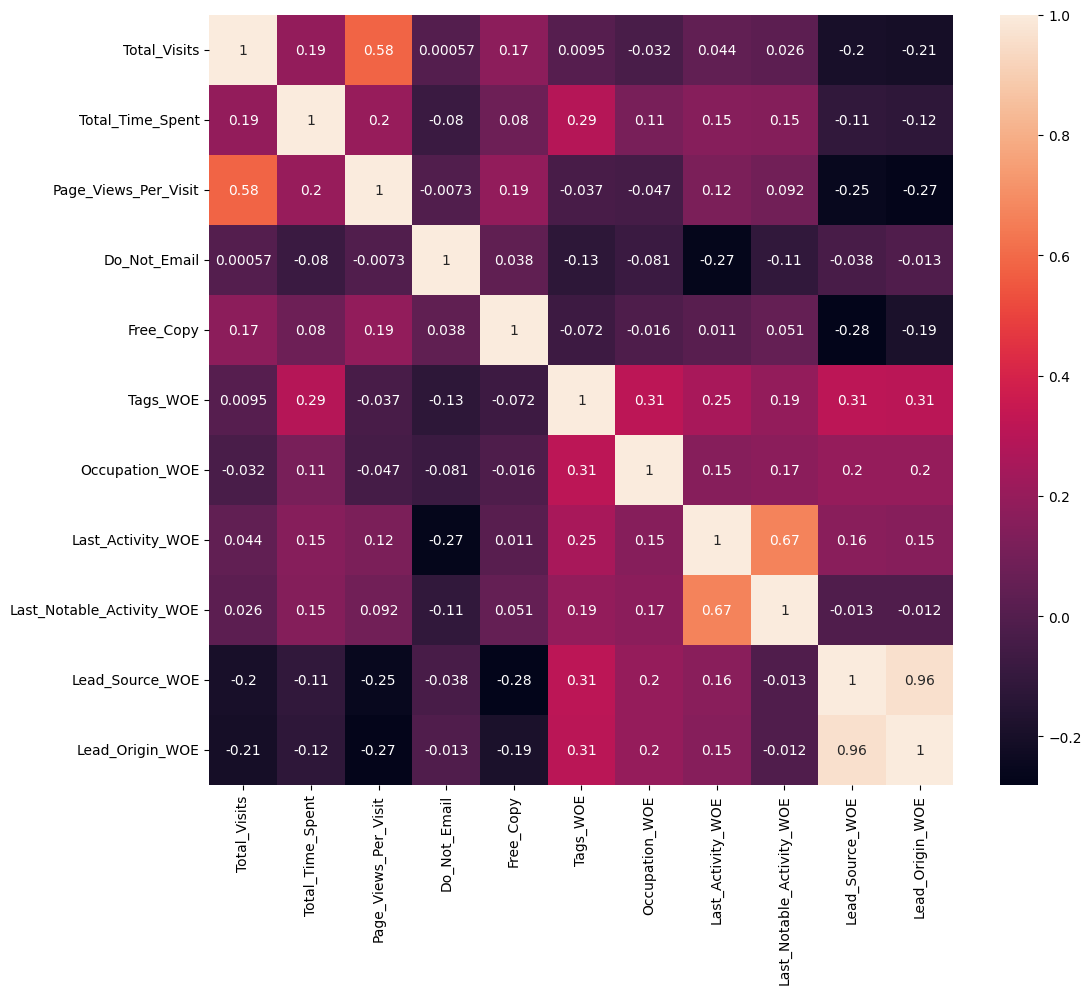

In [105]:
num_and_woe_columns = df.select_dtypes(np.number).drop(columns='Converted')

plt.figure(figsize=(12,10))
sns.heatmap(num_and_woe_columns.corr(), annot=True)

This heatmap is hard to tell what's going on.

Try to filter out which pair have a absolute correlation coef. >= 0.4 and ignore the rest.
- Replace the diagonal line with NaN 
- Replace all |correlation coef.| <= 0.4 with NaN
- Exclude variable that doesn't have notable correlation coef from the heatmap.

<Axes: >

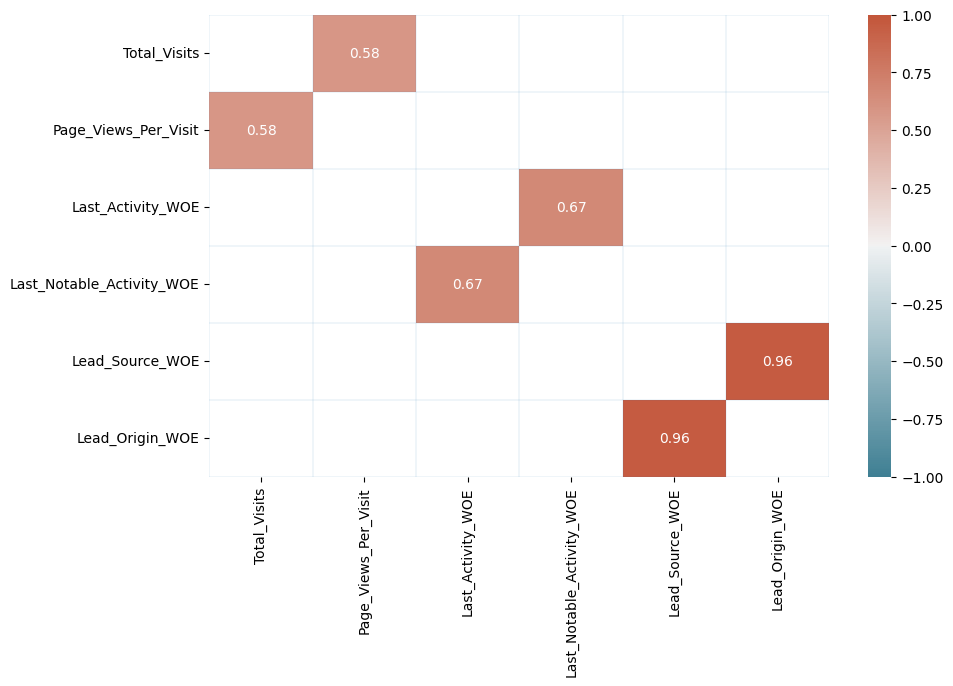

In [106]:
data = num_and_woe_columns.corr()

# replace the diag line with np.NaN
for i in range(0, len(data)):
    data.iloc[i,i]=np.NaN

# Get the variables that has high correlation coef. to other variables (>0.4 or <0.4)
heatmap_index = data.abs().max()[data.abs().max()>=0.4].index
data = data.loc[heatmap_index,heatmap_index.tolist()]

# replace all values that are <0.4 with np.NaN. We only care about correlation coef. >0.4
data = data.applymap(lambda x: np.NaN if abs(x) < 0.4 else x)

# plot
plt.figure(figsize=(10,6))
[plt.axhline(x, **{'lw': 0.1}) for x in range(0, len(data)+1)]
[plt.axvline(x, **{'lw': 0.1}) for x in range(0, len(data)+1)]
sns.heatmap(data, annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 20, as_cmap=True), vmax=1, vmin=-1)

This is a lot easier to look at. We can instantly identify the highly correlated pairs.

- Lead_Source and Lead_Origin have very strong correlation. Drop Lead_Source because it has lower IV.
- Last_Activity and Last_Notable_Activity has strong correlation. Drop Last_Notable_Activity as it has lower IV.
- Lead_Quality and Tag has strong correlation. Drop Lead_Quality as it has lower IV.

In [107]:
df_IV[df_IV.IV>0.4]

,feature,IV
2,Tags,4.619689
8,Occupation,0.738028
3,Last_Activity,0.558294
4,Last_Notable_Activity,0.458297
1,Lead_Source,0.418798
0,Lead_Origin,0.408993


**Drop the columns with high correlation coef. and see again**

<Axes: >

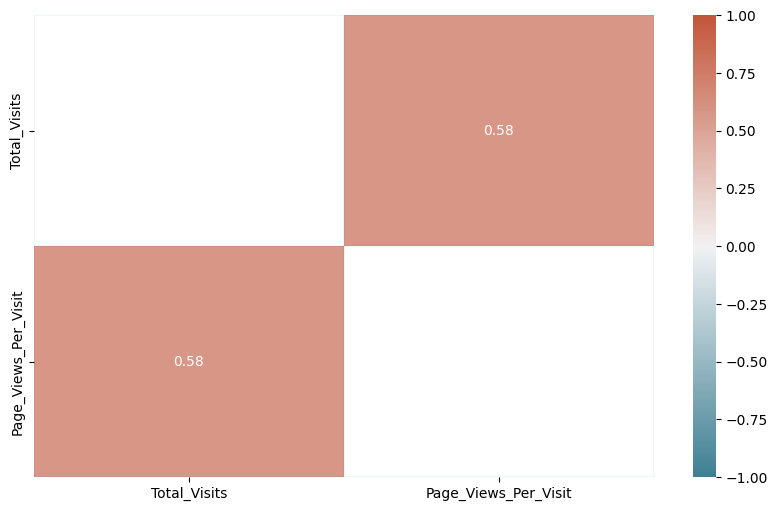

In [108]:
to_drop = ['Lead_Origin_WOE', 'Last_Notable_Activity_WOE']

data = num_and_woe_columns.drop(columns=to_drop).corr()

# replace the diag line with np.NaN
for i in range(0, len(data)):
    data.iloc[i,i]=np.NaN

# Get the variables that has high coef. correlation to other variables (>0.4 or <0.4)
heatmap_index = data.abs().max()[data.abs().max()>=0.4].index
data = data.loc[heatmap_index,heatmap_index.tolist()]

# replace all values that are <0.4 with np.NaN. We only care about coef. correlation >0.4
data = data.applymap(lambda x: np.NaN if abs(x) < 0.4 else x)

# plot
plt.figure(figsize=(10,6))
[plt.axhline(x, **{'lw': 0.1}) for x in range(0, len(data)+1)]
[plt.axvline(x, **{'lw': 0.1}) for x in range(0, len(data)+1)]
sns.heatmap(data, annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 20, as_cmap=True), vmax=1, vmin=-1)

In [109]:
# drop the _WOE columns above from the main dataframe
df.drop(columns=to_drop, inplace=True)

### Convert the significant categorical variables to dummies

In [110]:
to_dummies = ['Tags','Occupation','Last_Activity','Lead_Source']

# convert the categorical variables with high IV to dummies, replace space with _
dummies = pd.get_dummies(df[to_dummies])
dummies.columns = dummies.columns.str.replace(' ','_')

# drop reference values
reference_value_to_drop = [
    'Lead_Source_XNA',
    'Occupation_XNA',
    'Tags_XNA',
    'Last_Activity_XNA',
]
dummies.drop(columns=reference_value_to_drop, inplace=True)
dummies.head()

,Tags_Already_a_student,Tags_Busy,Tags_Cannot_contact,Tags_Closed_by_Horizzon,Tags_Diploma_holder,Tags_Graduation_in_progress,Tags_Interested_MBA,Tags_Interested_other_courses,Tags_Lost_to_EINS,Tags_Not_doing_further_edu,Tags_Others,Tags_Revert_after_email,Tags_Ringing,Occupation_Others,Occupation_Student,Occupation_Unemployed,Occupation_Working_Professional,Last_Activity_Converted_to_Lead,Last_Activity_Email_Bounced,Last_Activity_Email_Link_Clicked,Last_Activity_Email_Opened,Last_Activity_Form_Submitted_on_Website,Last_Activity_Olark_Chat_Conversation,Last_Activity_Others,Last_Activity_Page_Visited_on_Website,Last_Activity_SMS_Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Lead_Source_Direct_Traffic,Lead_Source_Google,Lead_Source_Olark_Chat,Lead_Source_Organic_Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral_Sites,Lead_Source_Social_Media,Lead_Source_Welingak_Website
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Append the dummies to main dataframe**

In [111]:
df = pd.concat([df, dummies], axis=1)

**Drop all string categorical variables**

In [112]:
df.drop(columns=df.select_dtypes('object').columns.tolist(), inplace=True)

## 4.5 View preprocessed data

In [113]:
df.shape

(7959, 47)

In [114]:
df.head()

,Total_Visits,Total_Time_Spent,Page_Views_Per_Visit,Do_Not_Email,Free_Copy,Converted,Tags_WOE,Occupation_WOE,Last_Activity_WOE,Lead_Source_WOE,Tags_Already_a_student,Tags_Busy,Tags_Cannot_contact,Tags_Closed_by_Horizzon,Tags_Diploma_holder,Tags_Graduation_in_progress,Tags_Interested_MBA,Tags_Interested_other_courses,Tags_Lost_to_EINS,Tags_Not_doing_further_edu,Tags_Others,Tags_Revert_after_email,Tags_Ringing,Occupation_Others,Occupation_Student,Occupation_Unemployed,Occupation_Working_Professional,Last_Activity_Converted_to_Lead,Last_Activity_Email_Bounced,Last_Activity_Email_Link_Clicked,Last_Activity_Email_Opened,Last_Activity_Form_Submitted_on_Website,Last_Activity_Olark_Chat_Conversation,Last_Activity_Others,Last_Activity_Page_Visited_on_Website,Last_Activity_SMS_Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Lead_Source_Direct_Traffic,Lead_Source_Google,Lead_Source_Olark_Chat,Lead_Source_Organic_Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral_Sites,Lead_Source_Social_Media,Lead_Source_Welingak_Website
0,0.0,0,0.0,0,0,0,-2.951815,0.091627,-0.747985,-0.087395,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,-2.993880,0.091627,-0.099354,-0.092404,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,0,1,1,3.689994,0.043309,-0.099354,-0.339222,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,-2.993880,0.091627,-0.263836,-0.339222,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,3.689994,0.091627,-1.484909,-0.002870,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [115]:
df.isna().sum().sum()

0

In [116]:
df.to_csv('leads_preprocessed.csv', index=False)

# 5. Building model

## Model building approach

### Performance metrics:

Our goal is to build a lead conversion prediction model that enables our sales team to focus their resources and time on the most promising leads. We aim to minimize both the false negative rate (i.e., identifying a hot lead as not potential, which may result in a loss of potential revenue) and the false positive rate (i.e., identifying a non-interested lead as potential, which may result in a waste of time and resources).

To achieve this objective, we will use F1 score as our primary performance metric because it considers both precision and recall, which are both important for minimizing both false negatives and false positives.

### Process:
1. **Feature Scaling**: We will start by scaling the numerical variables to ensure that they are on the same scale. This will help to prevent biases in our model caused by variables with larger values.
2. **Initial model building**: use only the numerical variables and the Weight of Evidence (WOE) of the categorical variables. This will help us understand the impact of each variable on the lead conversion rate.
3. **Feature selection**: Use RFE for feature selection, VIF for verifying no multicollinearity, and then eliminating insignificant features while building/refining. 
4. **Model Evaluation**: We will evaluate the performance of our model using a confusion matrix and a precision/recall curve to select the most appropriate threshold for balancing precision, recall, and F1 score.
5. **Model Refinement**: Based on the results of the first model, we may replace some categorical variables with their dummies to better understand how a specific category impacts the chance of a successful lead conversion.
6. **Model Comparison**: We will compare the performance of different models using the ROC Curve to arrive at the final model.
7. **Cross-Validation**: Since the size of our dataset is relatively small (about 8000 samples), we will use K-fold cross-validation to get a better idea of how well our model is likely to generalize to new data.


## Functions

In [117]:
# import necessary function for training, metrics, cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression 

from sklearn import metrics
from sklearn.metrics import ( 
    f1_score, accuracy_score, recall_score, precision_score, 
    classification_report, confusion_matrix, plot_confusion_matrix, 
    roc_auc_score, roc_curve, precision_recall_curve,
    # make_scorer,
)

In [118]:
# function to display confusion matrix on train and test data
def cf_train_test(y_train_actual, y_train_predicted, y_test_actual, y_test_predicted): 
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(8,4))
    
    heatmap_labels = ['Not converted', 'Converted']
    sns.heatmap(confusion_matrix(y_train_actual, y_train_predicted), annot=True,  fmt='.2f', 
                xticklabels= heatmap_labels, yticklabels= heatmap_labels,
               cbar=False, ax=ax1) 
    sns.heatmap(confusion_matrix(y_test_actual, y_test_predicted), annot=True,  fmt='.2f', 
                xticklabels=heatmap_labels, yticklabels=heatmap_labels,
               cbar=False, ax=ax2) 
    ax1.set(ylabel='Actual', xlabel='Predicted') 
    ax2.set(ylabel='Actual', xlabel='Predicted')
    plt.show()

In [119]:
# function for fitting the data and display confusion matrix in one line
def build_lg(features, threshold=0.5, cf=True, score=True, summary=True):
    '''
    features: list like, excluding const
    '''
    logres = sm.GLM(y_train, X_train_scaled[['const'] + features], family = sm.families.Binomial())
    model = logres.fit()
    if summary:
        print(model.summary())
    
    yhat_train = model.predict(X_train_scaled[['const'] + features])
    yhat_train = yhat_train.apply(lambda x: 1 if x>threshold else 0)
    yhat_test = model.predict(X_test_scaled[['const'] + features])
    yhat_test = yhat_test.apply(lambda x: 1 if x>threshold else 0)
    
    if cf:
        cf_train_test(y_train, yhat_train, y_test, yhat_test)
    if score:
        print('Train')
        print(classification_report(y_train, yhat_train))
        print('Test')
        print(classification_report(y_test, yhat_test))
    return model

## Train/test split and scaling

In [120]:
df = pd.read_csv('leads_preprocessed.csv')
df.head()

,Total_Visits,Total_Time_Spent,Page_Views_Per_Visit,Do_Not_Email,Free_Copy,Converted,Tags_WOE,Occupation_WOE,Last_Activity_WOE,Lead_Source_WOE,Tags_Already_a_student,Tags_Busy,Tags_Cannot_contact,Tags_Closed_by_Horizzon,Tags_Diploma_holder,Tags_Graduation_in_progress,Tags_Interested_MBA,Tags_Interested_other_courses,Tags_Lost_to_EINS,Tags_Not_doing_further_edu,Tags_Others,Tags_Revert_after_email,Tags_Ringing,Occupation_Others,Occupation_Student,Occupation_Unemployed,Occupation_Working_Professional,Last_Activity_Converted_to_Lead,Last_Activity_Email_Bounced,Last_Activity_Email_Link_Clicked,Last_Activity_Email_Opened,Last_Activity_Form_Submitted_on_Website,Last_Activity_Olark_Chat_Conversation,Last_Activity_Others,Last_Activity_Page_Visited_on_Website,Last_Activity_SMS_Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Lead_Source_Direct_Traffic,Lead_Source_Google,Lead_Source_Olark_Chat,Lead_Source_Organic_Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral_Sites,Lead_Source_Social_Media,Lead_Source_Welingak_Website
0,0.0,0,0.0,0,0,0,-2.951815,0.091627,-0.747985,-0.087395,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,-2.993880,0.091627,-0.099354,-0.092404,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,0,1,1,3.689994,0.043309,-0.099354,-0.339222,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,-2.993880,0.091627,-0.263836,-0.339222,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,3.689994,0.091627,-1.484909,-0.002870,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Split the data**

In [121]:
X = df.drop(columns='Converted')
X = sm.add_constant(X)
Y = df.Converted

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.1, random_state=14)
X_train.shape, X_test.shape

((7163, 47), (796, 47))

**Feature scaling**

In [122]:
# min max scaling
scaler = MinMaxScaler()

X_train_scaled = X_train.copy()
X_train_scaled[X_train_scaled.iloc[:,1:].columns] = scaler.fit_transform(X_train_scaled.iloc[:,1:])

X_test_scaled = X_test.copy()
X_test_scaled[X_test_scaled.iloc[:,1:].columns] = scaler.transform(X_test_scaled.iloc[:,1:])


## 5.1 Model 1: Feature selections with RFE and VIF, only use numerical variables and WOE values of categorical variables

### Max n-features selection with RFE

RFE can be used to select the best n features, but we have to decide how many n features we need. The code below will calculate with each n features, what is the highest VIF value among said n features to provide us a starting point.

In [123]:
def max_vif_n_features(features):
    '''
    features: list like, without 'const'
    '''
    max_vif_values = []
    model = LogisticRegression()
    X_data = X_train_scaled[['const'] + features]
    starting = 5

    # loop to calculate max VIF among n features
    for n_features in range(starting, X_data.iloc[:,1:].shape[1] + 1):
        rfe = RFE(model, n_features_to_select = n_features)
        rfe.fit(X_data.iloc[:,1:], y_train) 
        # top features selected
        top_n_features = rfe.get_feature_names_out(X_data.iloc[:,1:].columns).tolist()
        # calculate the highest vif values among the selected features
        vif_for_n_features = [vif(X_data[['const'] + top_n_features].values, i) for i in range(n_features+1)]
        max_vif_value = pd.Series(vif_for_n_features[1:]).max()
        max_vif_values = max_vif_values + [max_vif_value]
        if max_vif_value > 20:
            break

    df_result = pd.DataFrame({
        'n_features': range(starting, len(max_vif_values) + starting),
        'max_vif_value': max_vif_values
    })
    return df_result.sort_values('n_features', ascending=False)

In [124]:
# calculate how many features we can select before there is multicollinearity
woe_columns = X_train_scaled.loc[:,'Total_Visits':'Lead_Source_WOE'].columns.tolist()

max_vif_n_features(woe_columns)

,n_features,max_vif_value
4,9,1.601059
3,8,1.600138
2,7,1.595129
1,6,1.366133
0,5,1.363783


We can use all the features and they still have a max VIF value of 1.6.

In [125]:
# Function to select n features using RFE
def rfe_top_features(features, n_features):
    X_data = X_train_scaled[['const'] + features]
    y_data = y_train
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X_data,y_data) 
    result = pd.DataFrame({'ranking': rfe.ranking_, 'features': X_data.columns}).sort_values('ranking')
    
    print(f'Top {n_features} features:')
    return rfe.get_feature_names_out().tolist()

Select top 9 features:

In [126]:
model1_top_features = rfe_top_features(woe_columns, 9)
print(model1_top_features)

Top 9 features:
['Total_Visits', 'Total_Time_Spent', 'Page_Views_Per_Visit', 'Do_Not_Email', 'Free_Copy', 'Tags_WOE', 'Occupation_WOE', 'Last_Activity_WOE', 'Lead_Source_WOE']


### Calculating VIF for the top features selected with RFE

In [127]:
def checking_vif(top_features):
    data = X_train_scaled[['const'] + top_features]
    result = pd.DataFrame()
    result['feature'] = data.columns

    # Calculating VIF for each feature
    result['VIF'] = [
        vif(data.values, i) for i in range(len(data.columns))
    ]
    result['VIF'] = result['VIF'].apply(lambda x: round(x,2))
    return result.sort_values('VIF', ascending=False)

In [128]:
checking_vif(model1_top_features)

,feature,VIF
0,const,10.84
3,Page_Views_Per_Visit,1.60
1,Total_Visits,1.53
6,Tags_WOE,1.37
9,Lead_Source_WOE,1.34
2,Total_Time_Spent,1.21
8,Last_Activity_WOE,1.20
7,Occupation_WOE,1.14
5,Free_Copy,1.11
4,Do_Not_Email,1.09


No feature has a VIF higher than 5.

### Fit model

In [129]:
model1 = build_lg(model1_top_features, cf=False, score=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7153
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1446.1
Date:                Mon, 24 Apr 2023   Deviance:                       2892.2
Time:                        11:24:21   Pearson chi2:                 2.88e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6102
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.0262 

Drop 'Do_Not_Email' due to high p-value

In [130]:
model1_top_features.remove('Do_Not_Email')
model1 = build_lg(model1_top_features, cf=False, score=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7154
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.5
Date:                Mon, 24 Apr 2023   Deviance:                       2895.1
Time:                        11:24:22   Pearson chi2:                 2.81e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6101
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.0731 

Now all features are significant. Let's see the performance.

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7154
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.5
Date:                Mon, 24 Apr 2023   Deviance:                       2895.1
Time:                        11:24:22   Pearson chi2:                 2.81e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6101
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.0731 

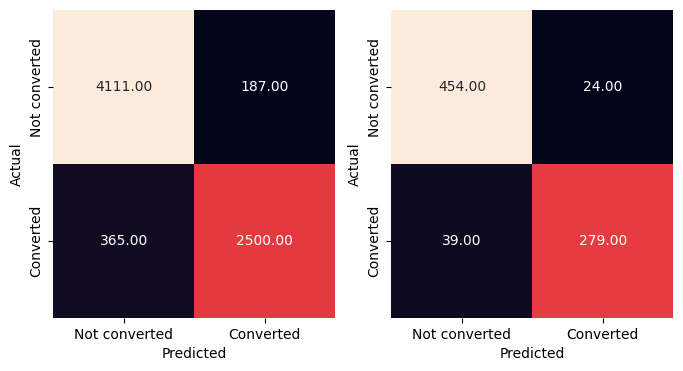

Train
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4298
           1       0.93      0.87      0.90      2865

    accuracy                           0.92      7163
   macro avg       0.92      0.91      0.92      7163
weighted avg       0.92      0.92      0.92      7163

Test
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       478
           1       0.92      0.88      0.90       318

    accuracy                           0.92       796
   macro avg       0.92      0.91      0.92       796
weighted avg       0.92      0.92      0.92       796



In [131]:
model1 = build_lg(model1_top_features)

This model has an F1 score of 0.9 and precision is 0.92 on test data but recall is only 0.88. We can find a better threshold for balancing Precision/Recall

In [132]:
# function to plot precision/recall curve
def pre_rec_curve(model, features, threshold=0.5, new=0):
    X_data = X_train_scaled[['const']+features]

    y_scores=model.predict(X_data)

    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
    thresholds = np.insert(thresholds, 0, 0)
    F1_score = 2*precisions*recalls/(precisions+recalls)


    # Plot values of precisions, recalls, and thresholds
    plt.figure(figsize=(10,7))
    plt.plot(thresholds, precisions, 'b--', label='precision')
    plt.plot(thresholds, recalls, 'g--', label = 'recall')
    plt.plot(thresholds, F1_score, 'r--', label = 'f1 score')

    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0.6,1])
    plt.axvline(threshold)
    if new!=0:
        plt.annotate('Current\nthreshold', xy=(threshold-0.01, 0.61), ha='right')
        # new threshold
        plt.axvline(new, color='r')
        plt.annotate('New\nthreshold', xy=(new-0.01, 0.61), ha='right', color='r')
    plt.show()

Plot the precision/recall curve

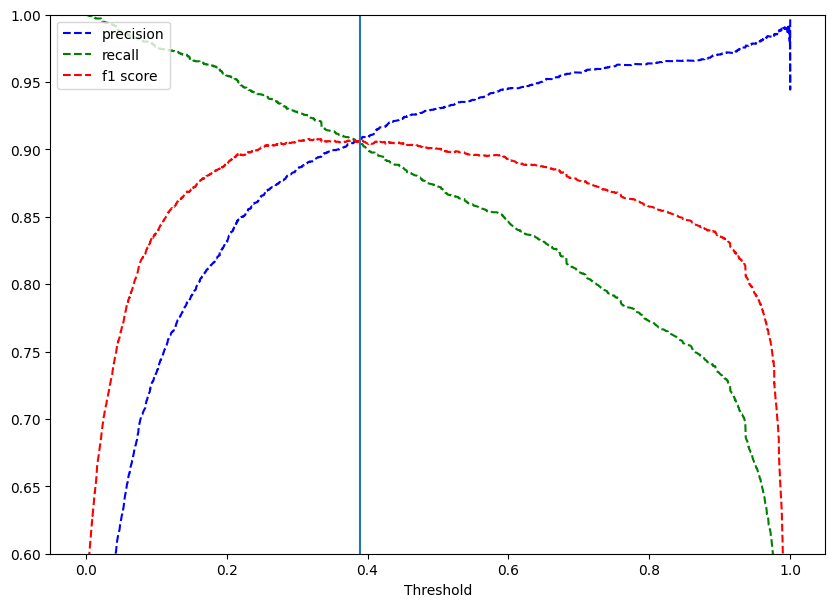

In [133]:
# precision/recall trade off for model1
pre_rec_curve(model1, model1_top_features, threshold=0.39)

The optimal threshold is about 0.4. Applying the new threshold:

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7154
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.5
Date:                Mon, 24 Apr 2023   Deviance:                       2895.1
Time:                        11:24:22   Pearson chi2:                 2.81e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6101
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.0731 

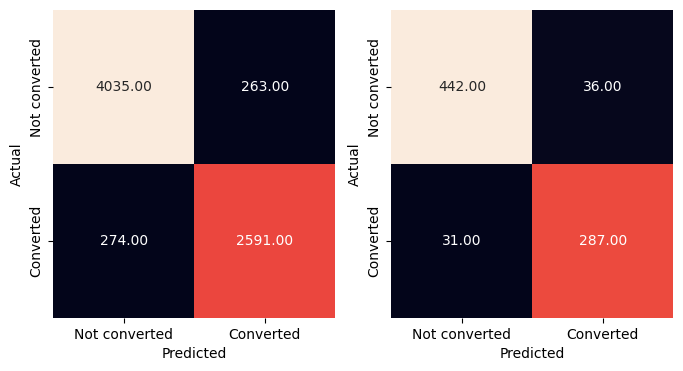

Train
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4298
           1       0.91      0.90      0.91      2865

    accuracy                           0.93      7163
   macro avg       0.92      0.92      0.92      7163
weighted avg       0.92      0.93      0.93      7163

Test
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       478
           1       0.89      0.90      0.90       318

    accuracy                           0.92       796
   macro avg       0.91      0.91      0.91       796
weighted avg       0.92      0.92      0.92       796



In [134]:
model1 = build_lg(model1_top_features, threshold=0.39)

**Conclusion:**
- The first model with numerical and WOE of categorical variables has an F1 score of 0.9 on the test set with balanced precision/recall after applying an optimal threshold.
- Total Time Spent are the most important numerical features, Tags and Last_Activity are the most important categorical features based on their coefficients.
- In the next model, we will replace Tags_WOE with their dummies to see how each category in Tags impacts the chance of predicting a potential lead.

## 5.2 Model 2: Use Tags dummies for better interpretability

### Max n-features selection with RFE

In [135]:
# replace the Tags_WOE with Tags dummies
woe_columns_without_Tags = [column for column in woe_columns if column!='Tags_WOE']
tags_dummies = df.loc[:,'Tags_Already_a_student':'Tags_Ringing'].columns.tolist()

model2_features = woe_columns_without_Tags + tags_dummies

In [136]:
# calculate how many features we can select before there is multicollinearity
max_vif_n_features(model2_features)

,n_features,max_vif_value
16,21,2.421013
15,20,2.244561
14,19,2.242965
13,18,2.236719
12,17,2.194695
11,16,2.194434
10,15,2.194430
9,14,2.134424
8,13,2.113398
7,12,2.046190


We can select all 21 features and the max VIF values is still around 2.4.

In [137]:
# Select top features with RFE
model2_top_features = rfe_top_features(model2_features, 21)
print(model2_top_features)

Top 21 features:
['Total_Visits', 'Total_Time_Spent', 'Page_Views_Per_Visit', 'Do_Not_Email', 'Free_Copy', 'Occupation_WOE', 'Last_Activity_WOE', 'Lead_Source_WOE', 'Tags_Already_a_student', 'Tags_Busy', 'Tags_Cannot_contact', 'Tags_Closed_by_Horizzon', 'Tags_Diploma_holder', 'Tags_Graduation_in_progress', 'Tags_Interested_MBA', 'Tags_Interested_other_courses', 'Tags_Lost_to_EINS', 'Tags_Not_doing_further_edu', 'Tags_Others', 'Tags_Revert_after_email', 'Tags_Ringing']


### Calculating VIF for selecting 21 top features

In [138]:
checking_vif(model2_top_features)

,feature,VIF
0,const,13.16
20,Tags_Revert_after_email,2.42
6,Occupation_WOE,1.81
3,Page_Views_Per_Visit,1.62
1,Total_Visits,1.55
12,Tags_Closed_by_Horizzon,1.53
21,Tags_Ringing,1.53
8,Lead_Source_WOE,1.50
7,Last_Activity_WOE,1.31
16,Tags_Interested_other_courses,1.28


No feature has a VIF value higher than 5.

### Fit model

In [139]:
model2 = build_lg(model2_top_features, cf=False, score=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7141
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1374.9
Date:                Mon, 24 Apr 2023   Deviance:                       2749.8
Time:                        11:24:26   Pearson chi2:                 5.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6179
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Drop Tags_Busy due to high p-value

In [140]:
model2_top_features.remove('Tags_Busy')
model2 = build_lg(model2_top_features, cf=False, score=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7142
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1375.1
Date:                Mon, 24 Apr 2023   Deviance:                       2750.2
Time:                        11:24:26   Pearson chi2:                 4.96e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6179
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Drop Do_Not_Email due to high p-value

In [141]:
model2_top_features.remove('Do_Not_Email')
model2 = build_lg(model2_top_features, cf=False, score=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7143
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1377.0
Date:                Mon, 24 Apr 2023   Deviance:                       2753.9
Time:                        11:24:26   Pearson chi2:                 4.83e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6177
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Now all the features are significant. Let's check the performance.

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7143
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1377.0
Date:                Mon, 24 Apr 2023   Deviance:                       2753.9
Time:                        11:24:26   Pearson chi2:                 4.83e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6177
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

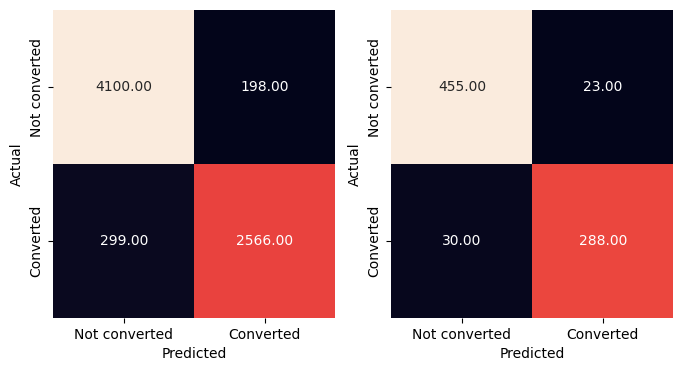

Train
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4298
           1       0.93      0.90      0.91      2865

    accuracy                           0.93      7163
   macro avg       0.93      0.92      0.93      7163
weighted avg       0.93      0.93      0.93      7163

Test
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       478
           1       0.93      0.91      0.92       318

    accuracy                           0.93       796
   macro avg       0.93      0.93      0.93       796
weighted avg       0.93      0.93      0.93       796



In [142]:
model2 = build_lg(model2_top_features)

We see that all F1/Precision/Recall have been improved from the first model. Check if there's an optimal threshold

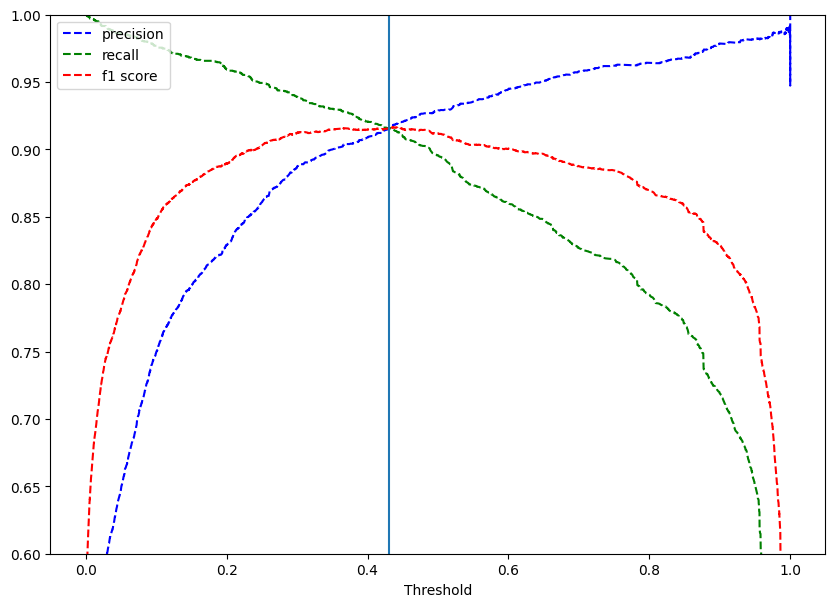

In [143]:
pre_rec_curve(model2, model2_top_features, 0.43)

Apply a new threshold of 0.43

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7143
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1377.0
Date:                Mon, 24 Apr 2023   Deviance:                       2753.9
Time:                        11:24:26   Pearson chi2:                 4.83e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6177
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

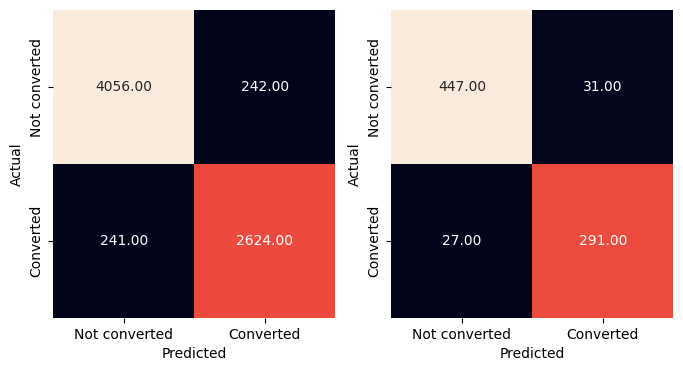

Train
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4298
           1       0.92      0.92      0.92      2865

    accuracy                           0.93      7163
   macro avg       0.93      0.93      0.93      7163
weighted avg       0.93      0.93      0.93      7163

Test
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       478
           1       0.90      0.92      0.91       318

    accuracy                           0.93       796
   macro avg       0.92      0.93      0.92       796
weighted avg       0.93      0.93      0.93       796



In [144]:
model2 = build_lg(model2_top_features, threshold=0.43)

**Conclusion:**
- Overall, model 2 (F1 0.91, Pre/Rec 0.90, 0.92) has better performance than model 1 (F1 0.90, P/R 0.89, 0.90) while also gives better explanability of Tags variable.

## 5.3 Model 3: Use Tags dummy and Last Activity dummies

As seen in model 1, Last Activity is also a very important categorical variable. In model 3, we will replace its WOE value with dummies to further improve interpretability.

### Max n-features selection with RFE

In [145]:
# exclude Tags and Last Activity WOE
woe_columns_excl_Tags_Activities = list(set(woe_columns)^set(['Tags_WOE', 'Last_Activity_WOE']))
woe_columns_excl_Tags_Activities

['Total_Time_Spent',
 'Page_Views_Per_Visit',
 'Do_Not_Email',
 'Total_Visits',
 'Occupation_WOE',
 'Free_Copy',
 'Lead_Source_WOE']

In [146]:
# get the Tags/Last_Activity's dummies

tags_dummies = df.loc[:,'Tags_Already_a_student':'Tags_Ringing'].columns.tolist()
last_act_dummies = df.loc[:,'Last_Activity_Converted_to_Lead':'Last_Activity_Unsubscribed'].columns.tolist()

model3_features = woe_columns_excl_Tags_Activities + tags_dummies + last_act_dummies

In [147]:
# calculate how many features we can select before there is multicollinearity
max_vif_n_features(model3_features)

,n_features,max_vif_value
25,30,21.713024
24,29,6.583511
23,28,5.193737
22,27,2.252701
21,26,2.251440
20,25,2.250456
19,24,2.244278
18,23,2.241616
17,22,2.240733
16,21,2.198984


Now that we have much higher number of features, we can see that if we select 28 features or more, there will be multicollinearity (VIF>5)

In [148]:
model3_top_features = rfe_top_features(model3_features, 27)
print(model3_top_features)

Top 27 features:
['Total_Time_Spent', 'Page_Views_Per_Visit', 'Do_Not_Email', 'Total_Visits', 'Occupation_WOE', 'Free_Copy', 'Lead_Source_WOE', 'Tags_Already_a_student', 'Tags_Cannot_contact', 'Tags_Closed_by_Horizzon', 'Tags_Diploma_holder', 'Tags_Graduation_in_progress', 'Tags_Interested_MBA', 'Tags_Interested_other_courses', 'Tags_Lost_to_EINS', 'Tags_Not_doing_further_edu', 'Tags_Others', 'Tags_Revert_after_email', 'Tags_Ringing', 'Last_Activity_Converted_to_Lead', 'Last_Activity_Email_Bounced', 'Last_Activity_Form_Submitted_on_Website', 'Last_Activity_Olark_Chat_Conversation', 'Last_Activity_Others', 'Last_Activity_Page_Visited_on_Website', 'Last_Activity_SMS_Sent', 'Last_Activity_Unsubscribed']


### Calculating VIF for selecting 22 top features

In [149]:
checking_vif(model3_top_features)

,feature,VIF
0,const,10.63
18,Tags_Revert_after_email,2.25
3,Do_Not_Email,1.98
21,Last_Activity_Email_Bounced,1.89
5,Occupation_WOE,1.74
4,Total_Visits,1.65
2,Page_Views_Per_Visit,1.63
10,Tags_Closed_by_Horizzon,1.52
7,Lead_Source_WOE,1.47
19,Tags_Ringing,1.46


### Fit model

In [150]:
model3 = build_lg(model3_top_features, cf=False, score=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7135
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1350.9
Date:                Mon, 24 Apr 2023   Deviance:                       2701.8
Time:                        11:24:37   Pearson chi2:                 1.76e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6205
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Drop Last_Activity_Unsubscribed due to its high p-value.

In [151]:
model3_top_features.remove('Last_Activity_Unsubscribed')
model3 = build_lg(model3_top_features, cf=False, score=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7136
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1351.5
Date:                Mon, 24 Apr 2023   Deviance:                       2702.9
Time:                        11:24:37   Pearson chi2:                 1.76e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6204
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Drop Last_Activity_Others due to its high p-value.

In [152]:
model3_top_features.remove('Last_Activity_Others')
model3 = build_lg(model3_top_features, cf=False, score=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7137
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1352.7
Date:                Mon, 24 Apr 2023   Deviance:                       2705.4
Time:                        11:24:37   Pearson chi2:                 1.89e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6203
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Now all features are significant. Let's see model performance.

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7137
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1352.7
Date:                Mon, 24 Apr 2023   Deviance:                       2705.4
Time:                        11:24:37   Pearson chi2:                 1.89e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6203
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

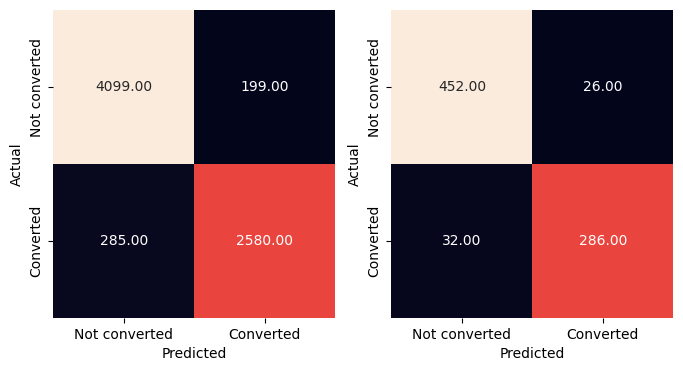

Train
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4298
           1       0.93      0.90      0.91      2865

    accuracy                           0.93      7163
   macro avg       0.93      0.93      0.93      7163
weighted avg       0.93      0.93      0.93      7163

Test
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       478
           1       0.92      0.90      0.91       318

    accuracy                           0.93       796
   macro avg       0.93      0.92      0.92       796
weighted avg       0.93      0.93      0.93       796



In [153]:
model3 = build_lg(model3_top_features)

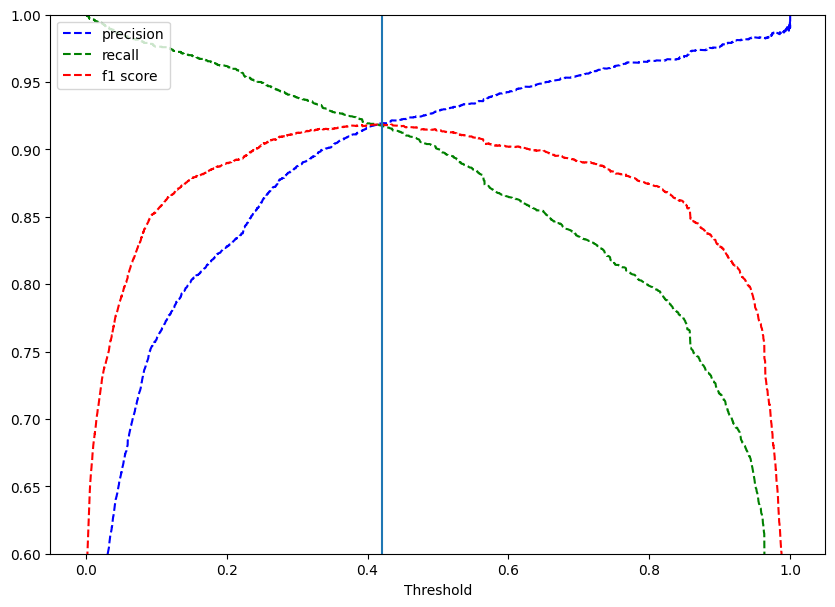

In [154]:
pre_rec_curve(model3, model3_top_features, 0.42)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7137
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1352.7
Date:                Mon, 24 Apr 2023   Deviance:                       2705.4
Time:                        11:24:37   Pearson chi2:                 1.89e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6203
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

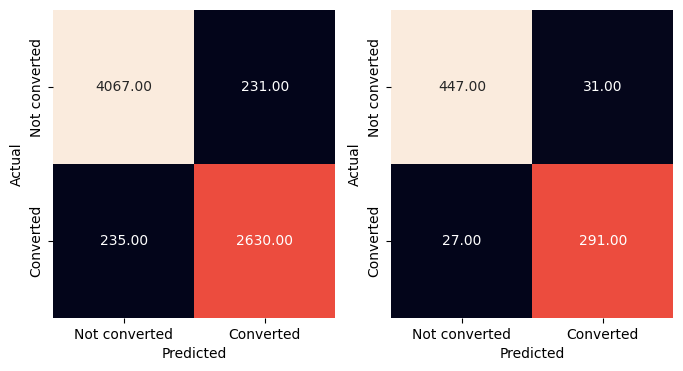

Train
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4298
           1       0.92      0.92      0.92      2865

    accuracy                           0.93      7163
   macro avg       0.93      0.93      0.93      7163
weighted avg       0.93      0.93      0.93      7163

Test
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       478
           1       0.90      0.92      0.91       318

    accuracy                           0.93       796
   macro avg       0.92      0.93      0.92       796
weighted avg       0.93      0.93      0.93       796



In [155]:
model3 = build_lg(model3_top_features, threshold=0.42)

While model 3 helps us understand the impact of Last Activity to the convert rate, its performance is not noticably better than model 2.

## 5.4 Compare models performance with ROC

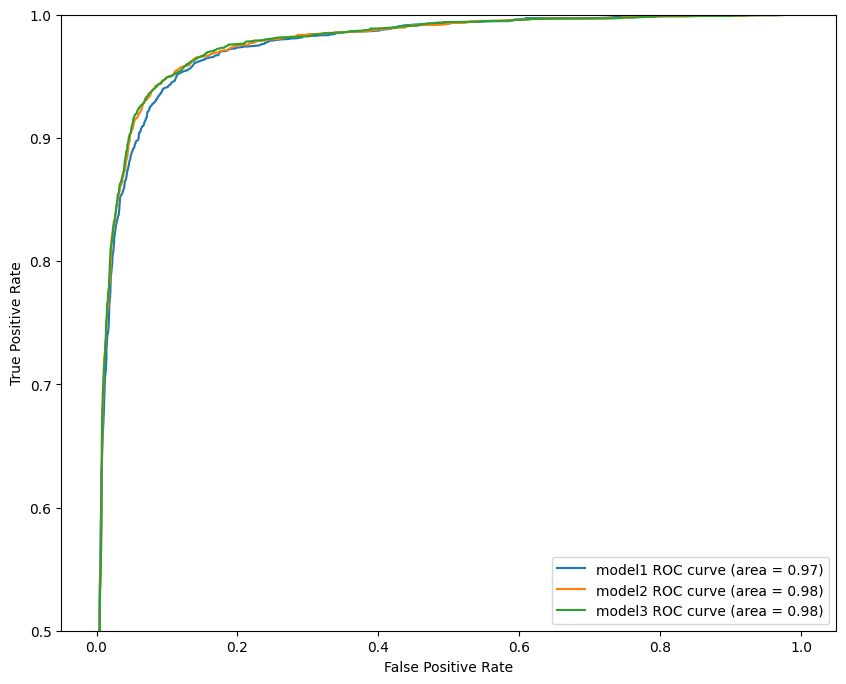

In [156]:
plt.figure(figsize=(10,8))
for model, model_name, feature in [
    (model1, 'model1', model1_top_features), 
    (model2, 'model2', model2_top_features),
    (model3, 'model3', model3_top_features)
]:
    yhat_proba = model.predict(X_train_scaled[['const']+feature])
    fpr, tpr, _ = metrics.roc_curve(y_train,  yhat_proba)
    auc_score = metrics.roc_auc_score( y_train, yhat_proba )
    sns.lineplot(x=fpr,y=tpr, label=model_name + ' ROC curve (area = %0.2f)' % auc_score)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.ylim(0.5,1)
plt.show()    

Model 2 and 3 have slightly better AUC than model 1.

## 5.5 K-fold Cross validation

Since we did not have many data to train and test, it is necessary to do K-fold cross validation to see if the model indeed can generalize well to new data.

In [157]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict

In [158]:
X_cv = pd.concat([X_train_scaled, X_test_scaled],axis=0)
y_cv = pd.concat([y_train, y_test],axis=0)

In [159]:
model1_cv = LogisticRegression()
model2_cv = LogisticRegression()
model3_cv = LogisticRegression()

In [160]:
cv_result = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

In [161]:
models_list = [
    (model1_cv, 'model1', model1_top_features, .39),
    (model2_cv, 'model2', model2_top_features, .43),
    (model3_cv, 'model3', model3_top_features, .42)
]

for model, model_name, top_features, threshold in models_list:

    kfold_10 = KFold(n_splits=8, shuffle=True, random_state=14)

    # Make predictions with k-fold cross-validation
    y_pred_proba = cross_val_predict(model, X_cv[top_features], y_cv, cv=kfold_10, method='predict_proba')
    yhat_cv = (y_pred_proba[:, 1] >= threshold).astype(int)

    # Calculate evaluation metrics for the predictions
    accuracy = accuracy_score(y_cv, yhat_cv)
    precision = precision_score(y_cv, yhat_cv)
    recall = recall_score(y_cv, yhat_cv)
    f1 = f1_score(y_cv, yhat_cv)
    auc = roc_auc_score(y_cv, y_pred_proba[:, 1])
    
    result = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1': [f1],
        'AUC': [auc]
    })
    cv_result = pd.concat([cv_result, result], axis=0, ignore_index=True)

In [162]:
cv_result

,Model,Accuracy,Precision,Recall,F1,AUC
0,model1,0.924237,0.907712,0.902293,0.904994,0.973579
1,model2,0.930645,0.918283,0.907320,0.912769,0.974302
2,model3,0.932278,0.918354,0.911719,0.915024,0.974777


K fold crossval showed that the all the models we have do generalize well. Model 3 has the best performance of all, with model 2 very close behind.

## 5.6 Final model selection and feature interpretation

Model 3 (AUC = 0.975) will be selected as the final model, for its performance, explanability and ability to generalize.

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7163
Model:                            GLM   Df Residuals:                     7137
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1352.7
Date:                Mon, 24 Apr 2023   Deviance:                       2705.4
Time:                        11:25:00   Pearson chi2:                 1.89e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6203
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

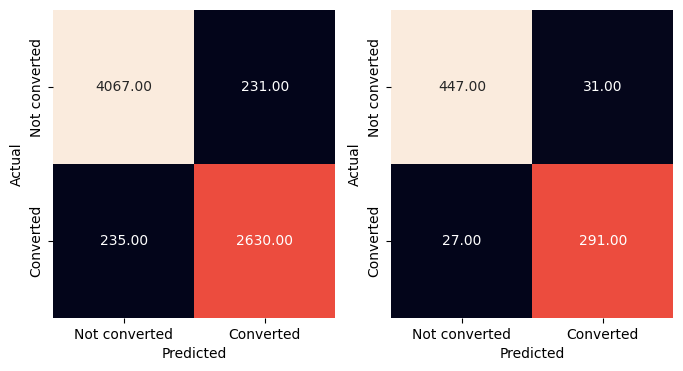

Train
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4298
           1       0.92      0.92      0.92      2865

    accuracy                           0.93      7163
   macro avg       0.93      0.93      0.93      7163
weighted avg       0.93      0.93      0.93      7163

Test
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       478
           1       0.90      0.92      0.91       318

    accuracy                           0.93       796
   macro avg       0.92      0.93      0.92       796
weighted avg       0.93      0.93      0.93       796



In [163]:
model3 = build_lg(model3_top_features, threshold=0.42)

#### **Model performance**

- Model has an accuracy of 93% on the train and test set.

- The model is good in both predicting the hot leads and cold leads, with Recall at 92%, Precision is 90%, results in a F1 score of 91% when at the optimal threshold (0.42)

#### **Feature interpretation**

Features that have a **positive effect** on the chance of conversion

In [164]:
model3.params[model3.params>0].sort_values(ascending=False)

Tags_Lost_to_EINS          4.896269
Tags_Closed_by_Horizzon    4.792340
Occupation_WOE             4.526694
Total_Time_Spent           4.093767
Tags_Revert_after_email    3.040651
Total_Visits               3.016675
Lead_Source_WOE            1.800476
Last_Activity_SMS_Sent     1.499414
dtype: float64

- Total_Time_Spent and Total_Visits are 2 numerical features that positively affect the chance of conversion. This indicate that the people who are interested tend to visit more often and spend more time on each visit.
- Leads that were tagged as Revert_after_email, Lost_to_EINS, Closed_by_Horizzon,... also have a higher chance of being converted.
- Other features are Last_Activity_SMS_Sent, Lead_Source_WOE, Occupation_WOE.

Features that have a **negative effect** on the chance of conversion:

In [165]:
model3.params[model3.params<0].sort_values()

Tags_Diploma_holder                       -4.862708
Tags_Not_doing_further_edu                -4.449880
Tags_Already_a_student                    -4.314084
Tags_Interested_MBA                       -4.309675
Tags_Cannot_contact                       -4.271480
Tags_Ringing                              -4.028486
Tags_Interested_other_courses             -3.448672
const                                     -3.054744
Tags_Graduation_in_progress               -2.126932
Page_Views_Per_Visit                      -1.799430
Last_Activity_Converted_to_Lead           -1.444002
Last_Activity_Email_Bounced               -1.213302
Last_Activity_Form_Submitted_on_Website   -1.145996
Tags_Others                               -1.089809
Last_Activity_Page_Visited_on_Website     -0.803544
Do_Not_Email                              -0.695509
Last_Activity_Olark_Chat_Conversation     -0.611650
Free_Copy                                 -0.353726
dtype: float64

- More Page_Views_Per_Visit negatively correlated with the chance of conversion. Some of the possible explanations could be: 
>- unable to find the information they are looking for (course description/fee/requirement/etc...)
>- browsing though different courses/programs and unable to choose one.
- Certain tags related to the leads' education status/interest (Diploma_holder, Not_doing_further_edu,...) and contactability (Cannot_contact, Ringing,...) can negative correlated with the chance of being converted as well.  


## 5.7 Lead scoring

The problem statement mentioned the model should produce a score between 0-100 for each lead. We can multiply the predicted probability with 100.

In [166]:
# multiply the proba with 100
score_prediction = pd.DataFrame({
    'Predicted_score': model3.predict(X_test_scaled[['const']+model3_top_features])*100,
    'Actual': y_test,
})
# round up
score_prediction.Predicted_score = score_prediction.Predicted_score.astype(int)

score_prediction.head(10)

,Predicted_score,Actual
6339,6,0
3550,23,0
7691,91,1
2681,2,0
6366,23,0
7095,98,1
2039,67,0
7183,56,1
1916,99,1
2537,0,1


# 6.Subjective questions

### Question 3

X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

**Answer**: 

The solution is to lower the threshold for 'Convert' prediction. This way, there will be more leads get classified as hot leads for the interns to work on. This will increase recall at the cost of reduced precision (less false negative rate but more false positive rate).

The exact threshold adjustment should be made according to the capability of the interns. A suggested range can be around 0.2~0.25. Any lower will result in a steep decline in precision without any significant gain in recall.

Plot the current vs new threshold:

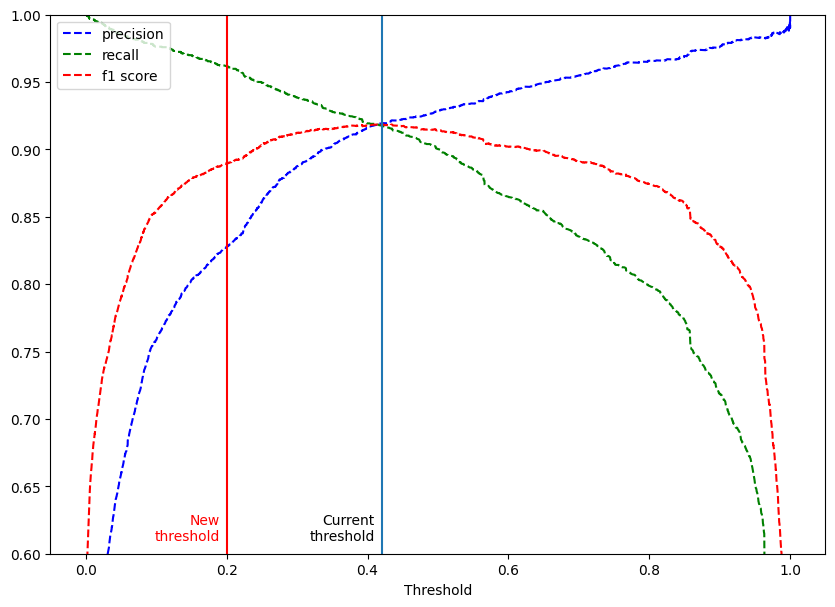

In [167]:
pre_rec_curve(model3, model3_top_features, threshold = 0.42, new = 0.2)

Confusion matrix with the new threshold:

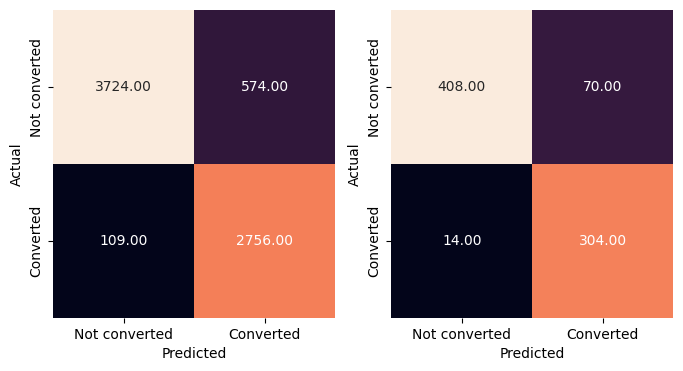

Train
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4298
           1       0.83      0.96      0.89      2865

    accuracy                           0.90      7163
   macro avg       0.90      0.91      0.90      7163
weighted avg       0.91      0.90      0.91      7163

Test
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       478
           1       0.81      0.96      0.88       318

    accuracy                           0.89       796
   macro avg       0.89      0.90      0.89       796
weighted avg       0.91      0.89      0.90       796



In [168]:
build_lg(model3_top_features, threshold=0.2, summary=False)

### Question 4

Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

**Answer:**

The solution is the exact opposite of the previous question, which is to increase the threshold for hot leads. Doing this will reduce the number of leads that classified as hot, but also will reduce the false negative rate. The final result is that the team will have fewer, but more promising leads to chase.

The exact threshold increase still needs to be discussed, but around 0.7~0.8 should be a good starting point. Depends on what the team’s definition of “Extremely necessary” is, the threshold can be pushed as high as 0.95.

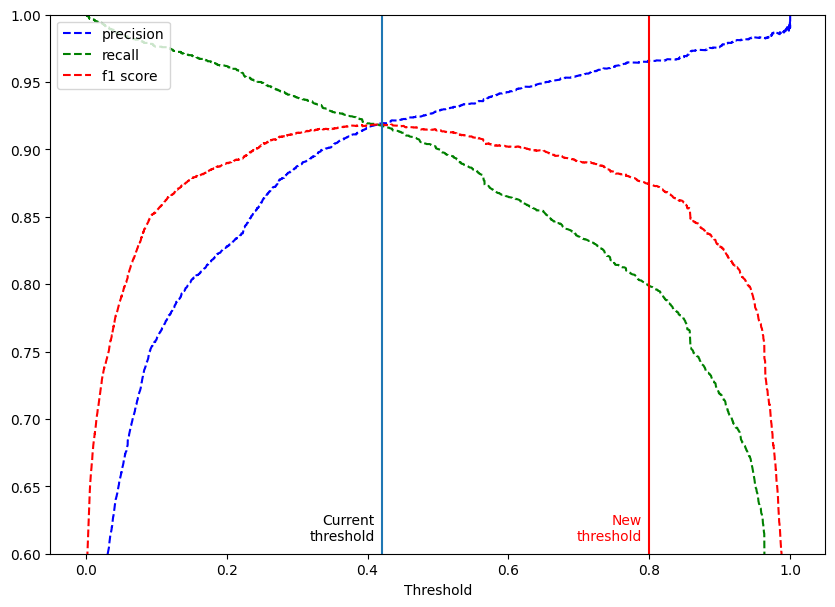

In [169]:
pre_rec_curve(model3, model3_top_features, threshold = 0.42, new = 0.8)

Model 3's performance with threshold at 0.8

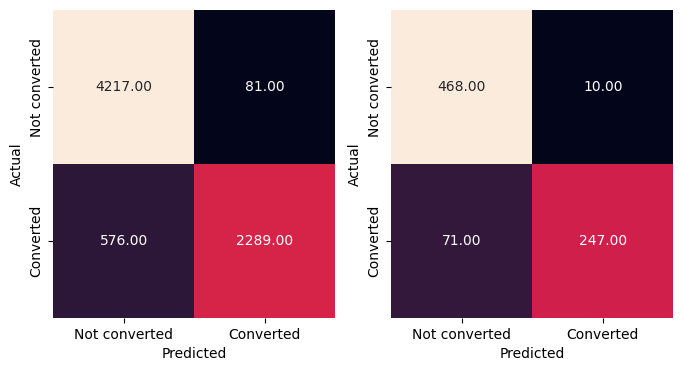

Train
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4298
           1       0.97      0.80      0.87      2865

    accuracy                           0.91      7163
   macro avg       0.92      0.89      0.90      7163
weighted avg       0.91      0.91      0.91      7163

Test
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       478
           1       0.96      0.78      0.86       318

    accuracy                           0.90       796
   macro avg       0.91      0.88      0.89       796
weighted avg       0.91      0.90      0.90       796



In [170]:
build_lg(model3_top_features, threshold=0.8, summary=False)

Model 3's performance with threshold at 0.98

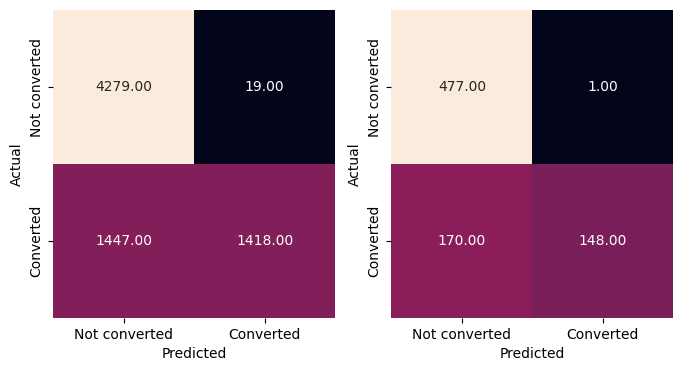

Train
              precision    recall  f1-score   support

           0       0.75      1.00      0.85      4298
           1       0.99      0.49      0.66      2865

    accuracy                           0.80      7163
   macro avg       0.87      0.75      0.76      7163
weighted avg       0.84      0.80      0.78      7163

Test
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       478
           1       0.99      0.47      0.63       318

    accuracy                           0.79       796
   macro avg       0.87      0.73      0.74       796
weighted avg       0.84      0.79      0.76       796



In [171]:
build_lg(model3_top_features, threshold=0.98, summary=False)

- At 0.80: 20% less leads classified as hot, precision increase to 0.96 (from 0.9)
- At 0.98:  50% less leads classified as hot, precision increase to 0.99

***
End of analysis. Thank you.